In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CsvFiles/INNHotelsGroup.csv')

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 36275 rows and 19 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- There are no null values in any columns
- `Booking_ID`, `Booking_Status` features are object type
- `required_car_parking_space` is numeric type in dataset but actually it denotes whether a customer requires car parking space or not, ie, Yes/No
- `repeated_guest` is numeric type in dataset but actually it denotes if the customer a repeated guest or not, ie, Yes/No
- There are 14 features of numeric type, rest 5 of them are objects

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN36275,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


- The minimum number of adults recorded in a booking is 0, which is unusual since a hotel booking typically requires at least one adult. This anomaly should be investigated. The maximum number of adults per booking is 4.
- The number of children per booking ranges from 0 to 10.
- Most guests book for up to 2 weekend nights, although some bookings extend to as many as 7 weekend nights.
- Similarly, the majority of bookings include up to 3 weeknights, while a few extend to as many as 17 weeknights, indicating longer stays for certain customers.
- Meal Plan 1 (Breakfast only) is the most commonly selected option among guests.
- Room Type 1 is the most frequently reserved room category.
- On average, rooms are booked approximately 3 months in advance. About 75% of bookings are made within 4.5 months prior to arrival, though a few cases show bookings made on the arrival date or over a year in advance.
- The `arrival_year` feature represented as integer type shows the customer have stayed in hostel for years 2017 to 2018
- The `arrival_month`, `arrival_date` feature eflect the specific months and dates of customer stays across these years.
- `arrival_date`, `arrival_month`, `arrival_year` is numeric in dataset but represent discrete temporal values (year, month, and date).
- The majority of reservations are made through online channels, highlighting the hotel's strong online visibility and customer reach.
- A maximum of 13 previous booking cancellations have been recorded for a single customer.
- Some customers have made up to 58 prior bookings without cancellations
- The average room price is around 103 euros per night, with the highest recorded price reaching 540 euros, showing significant variation in pricing.
- 75% of the customers booking have atmost 1 special request.However some customers have made upto 5 requests
- Minimum average price per room in dataset is 0 euros.This is unusual and should be investigated
- The majority of bookings were not canceled, suggesting that most guests follow through with their reservations.

**Check for Duplicate Values**

In [ ]:
df.duplicated().sum()

np.int64(0)

- There are no duplicate values in the dataset

**Check for Missing Values**

In [ ]:
df.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


**Data-Preprocessing**

- Dropping `Booking_ID	` feature as it represents the unique identifier of each booking.Hence doesn't contribute in out analysis

In [ ]:
df = df.drop(['Booking_ID'], axis=1)

- Analysing the values of object type features

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(df[col].value_counts())
    print('-'*100)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


- The unique values in the object type features seem to consistent with values mentioned in data dictionary

# EDA

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate Analysis

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


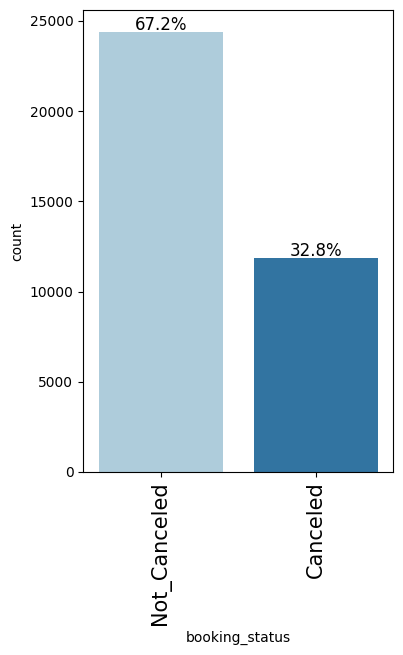

In [ ]:
labeled_barplot(df, 'booking_status', perc=True)

- 67% of the bookings have not been cancelled
- This shows a class imbalance of target variable in dataset

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


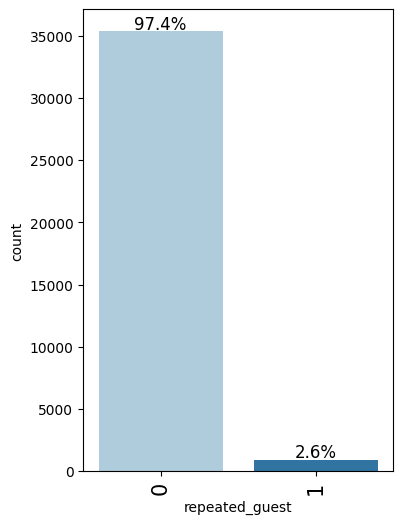

In [ ]:
labeled_barplot(df, 'repeated_guest', perc=True)

- 97% of the bookings are of new customers, only ~3% of customers book the inn again

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


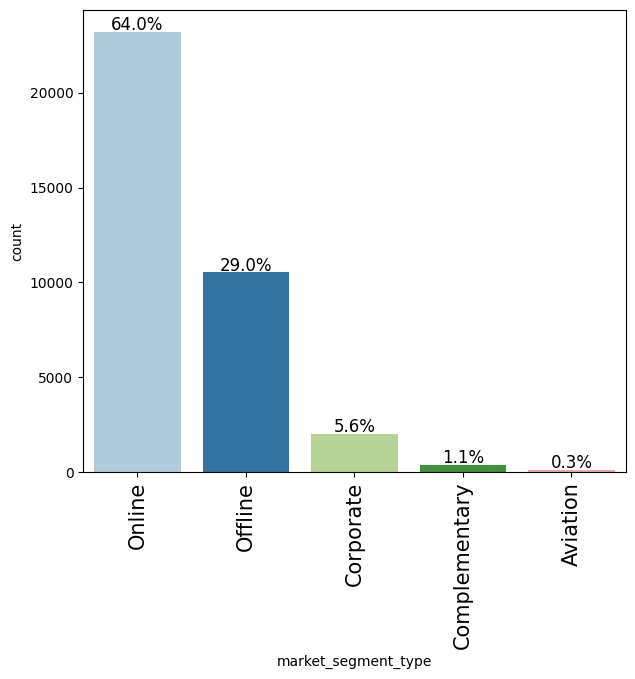

In [ ]:
labeled_barplot(df, 'market_segment_type', perc=True)

- 64% of the bookings are done online followed by offline bookings that accounts to 29%

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


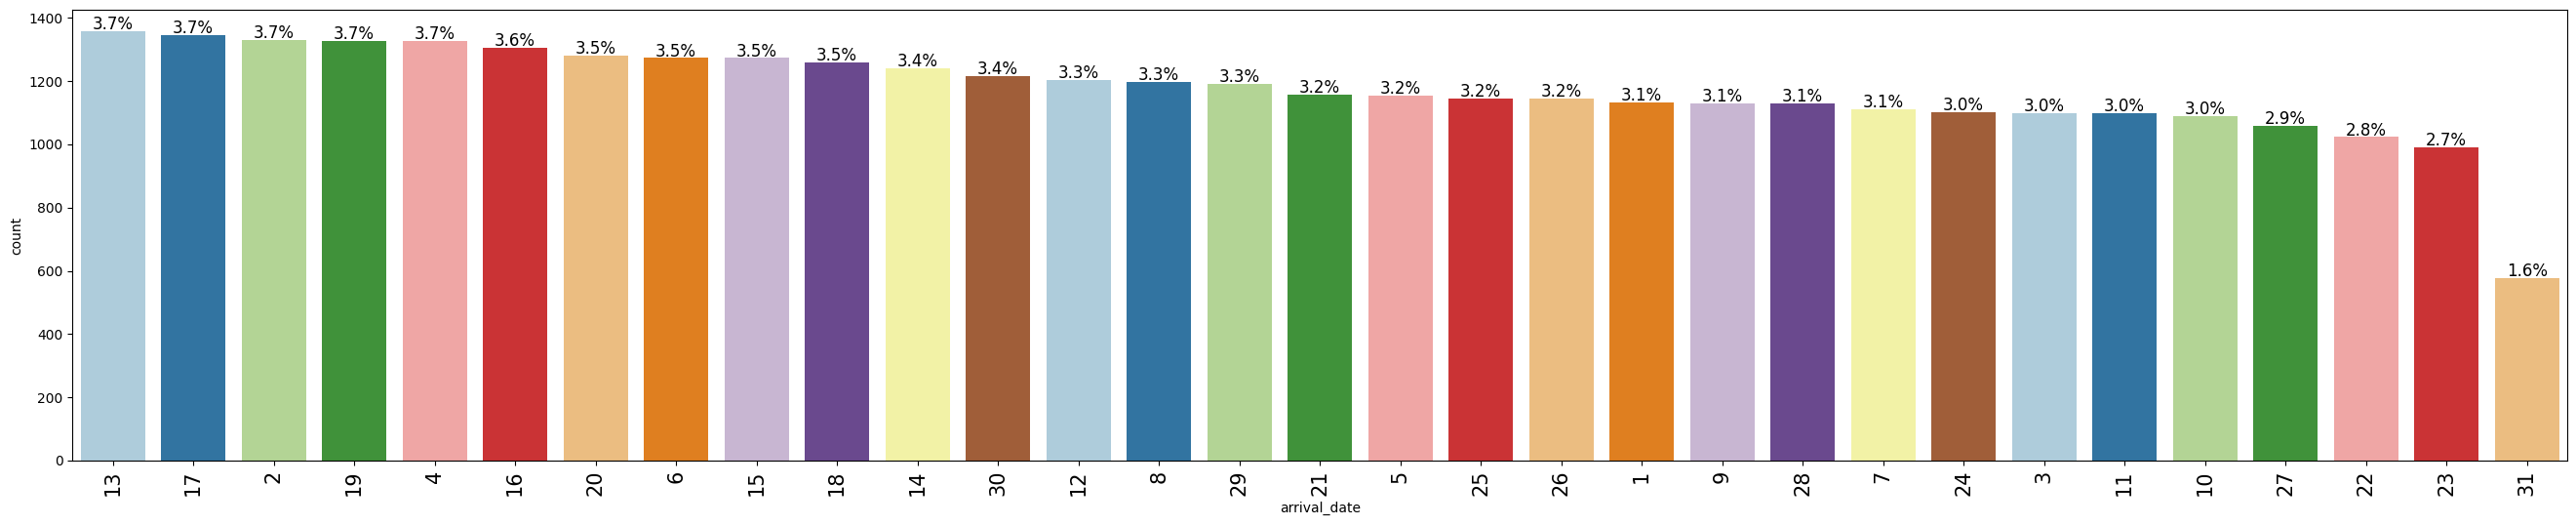

In [ ]:
labeled_barplot(df, 'arrival_date', perc=True)

- All days of month have equal percent of guest arrivals except for 31st of a month considering its the last day

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


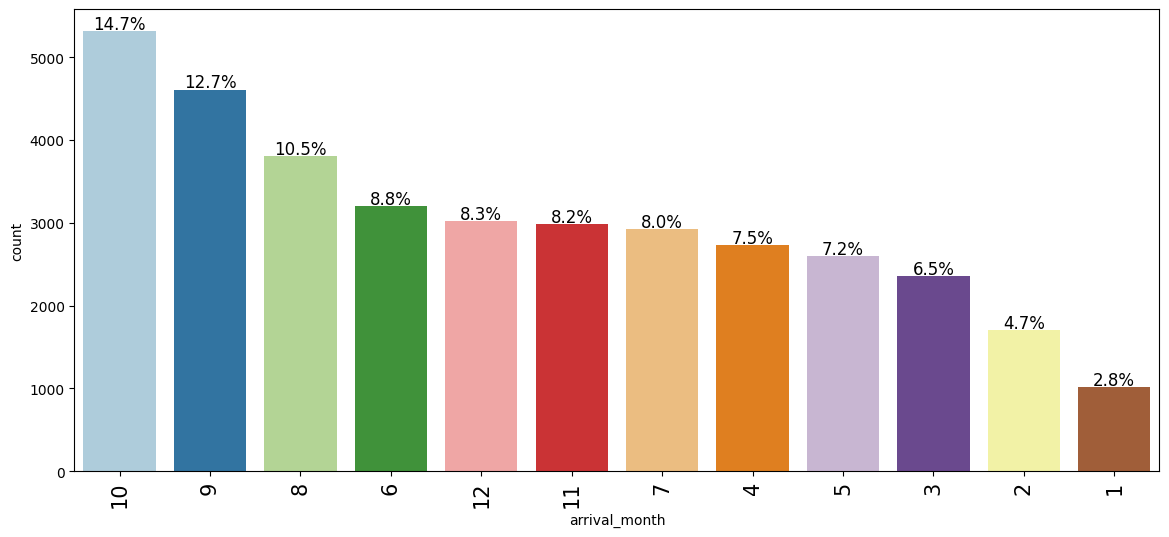

In [ ]:
labeled_barplot(df, 'arrival_month', perc=True)

- The most popular time for guests to arrive is in the second half of the year, particularly from July through December, which coincides with the fall and winter seasons.
- The most popular month for visitors is October, followed by September. This is because in September - October, Portugal's weather shifts to mild autumn conditions mild and pleasant
- The festive season in November and December also seems to attracts a high number of guests.

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


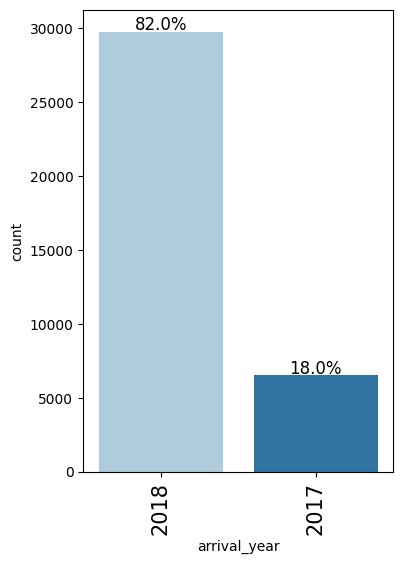

In [ ]:
labeled_barplot(df, 'arrival_year', perc=True)

- Year 2018 has witnessed a significant increase in guest arrivals as compared to year 2017
- Only 18% of the customers visited in 2017 while rest 82% guests arrived in 2018.This might be a indicator of growing popularity of INN Hotels Group

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


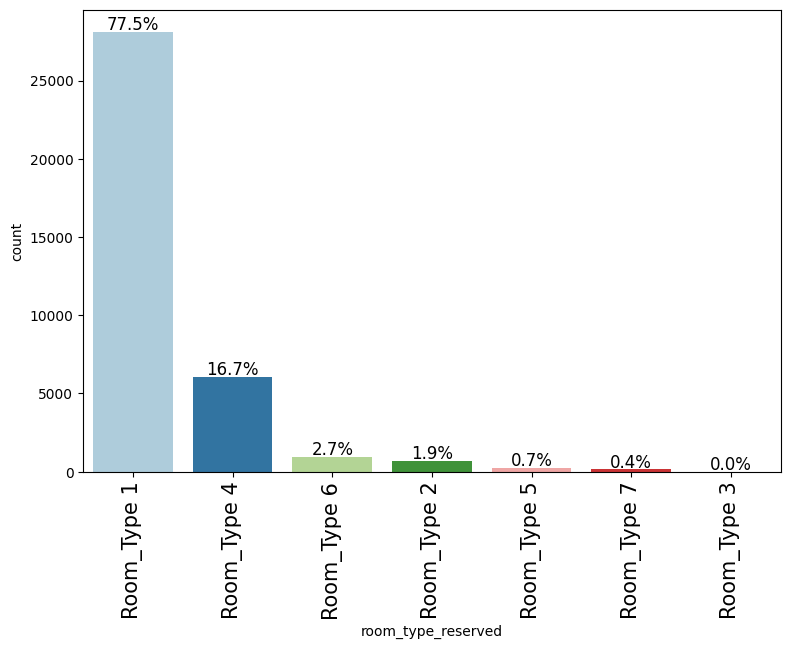

In [ ]:
labeled_barplot(df, 'room_type_reserved', perc=True)

- Room Type 1 is the most popular choice, booked by 77.5% of the customers

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


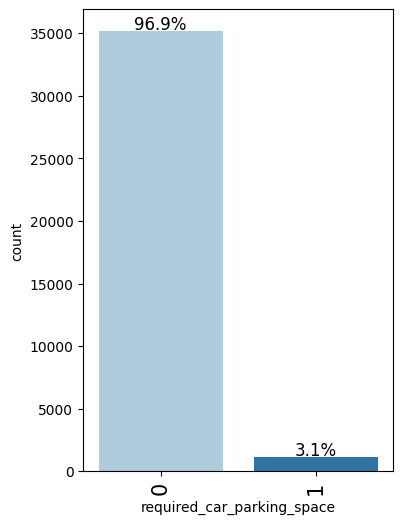

In [ ]:
labeled_barplot(df, 'required_car_parking_space', perc=True)

- ~97% of the customers haven't demanded for car parking space while booking

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


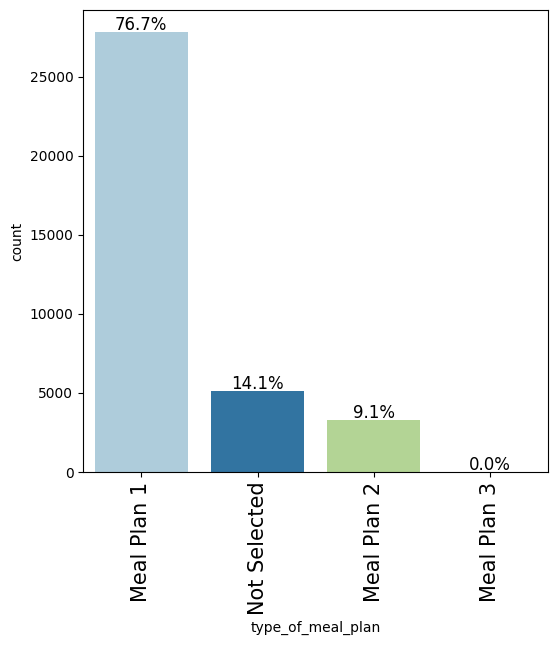

In [ ]:
labeled_barplot(df, 'type_of_meal_plan', perc=True)

- ~78% of bookings have opted for Meal Plan 1 consisting of only Breakfast followed by next 14% who haven't selected any meal plan
- We can further investigate why meal plans 2 and 3 are not opted during bookings

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


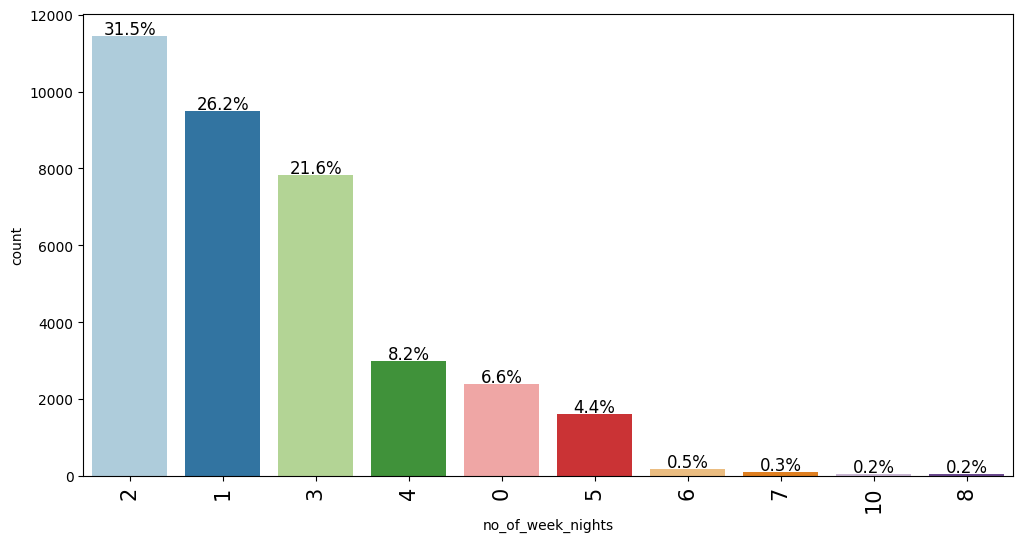

In [ ]:
labeled_barplot(df, 'no_of_week_nights', perc=True, n=10)

- Most weekday bookings(31.5%) are for 2 nights, followed by 1-3 nights, indicating a preference for short stays.
- Less than 2% of bookings are for stays longer than 5 weekday nights.
- Presence of 0 weekday nights (≈6.6%), this might indicate customers opting for weekend night stays

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


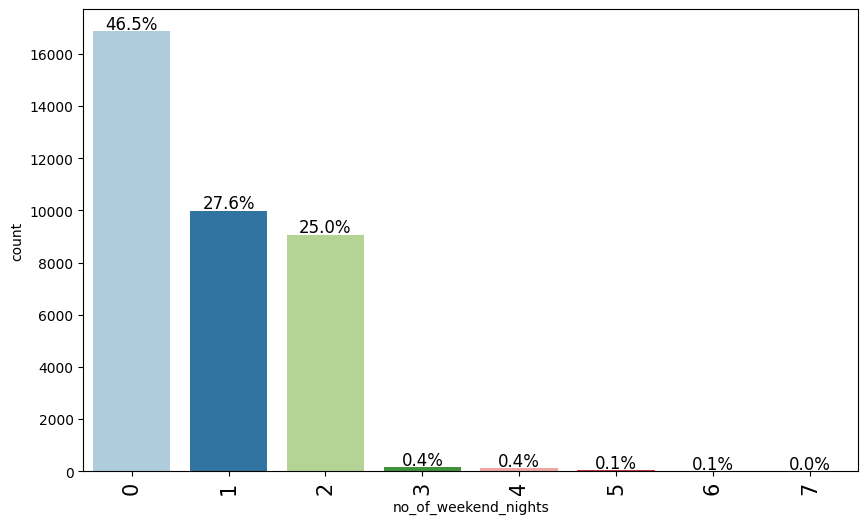

In [ ]:
labeled_barplot(df, 'no_of_weekend_nights', perc=True)

- Nearly half of all bookings(46.5%) do not include a weekend stay.
- About half (≈53.5%) include weekends, with atmost 2 weekend nights stay indicating guests on short trips
- Very few bookings (less than 1% combined) last beyond two weekend nights.

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


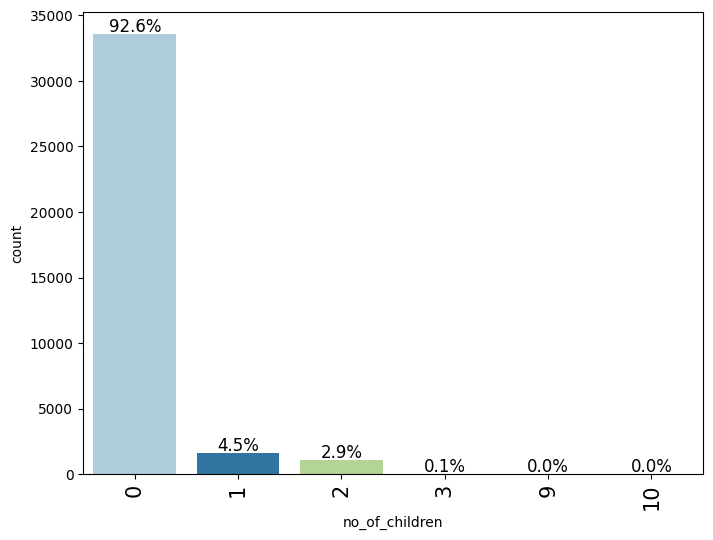

In [ ]:
labeled_barplot(df, 'no_of_children', perc=True)

- ~93% of the guests don't bring in children with them

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


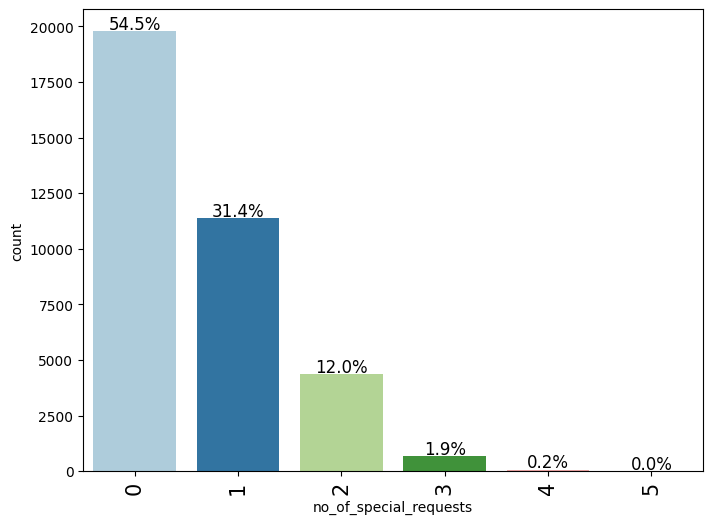

In [ ]:
labeled_barplot(df, 'no_of_special_requests', perc=True)

- Nearly half of the bookings(54.5%) don't have any special requests
- Only 43% of bookings make 1 or 2 special requests

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


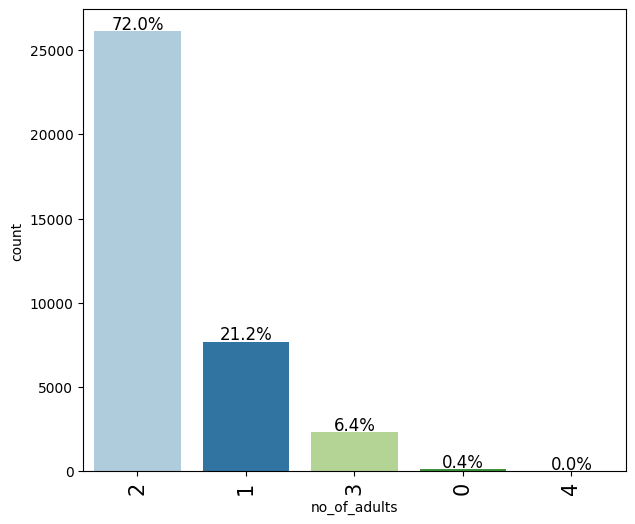

In [ ]:
labeled_barplot(df, 'no_of_adults', perc=True)

- 72% of the bookings have only 2 adults.Rest of the bookings having 1 or 3 adult.Indicating that the stays are only for a short group of people
- As mentinioned before about 0.4% of the bookings have zero adults which is an anomaly as hotel checking legally needs to done by adults

/tmp/ipython-input-2394099991.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


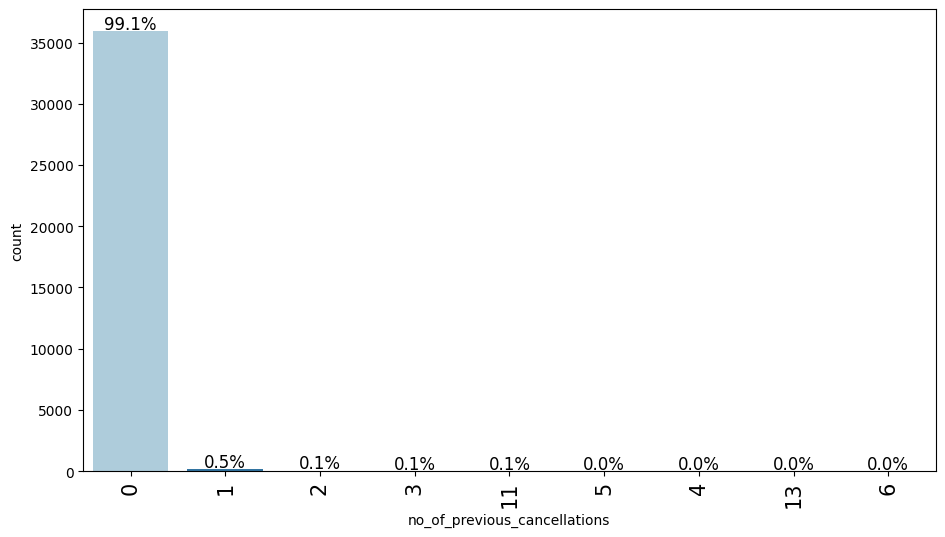

In [ ]:
labeled_barplot(df, 'no_of_previous_cancellations', perc=True)

- 99% of the bookings don't have previous cancellations
- This needs further investigation.For example, we need to find out if the booking is done by a repeated guest how many times have they cancelled before

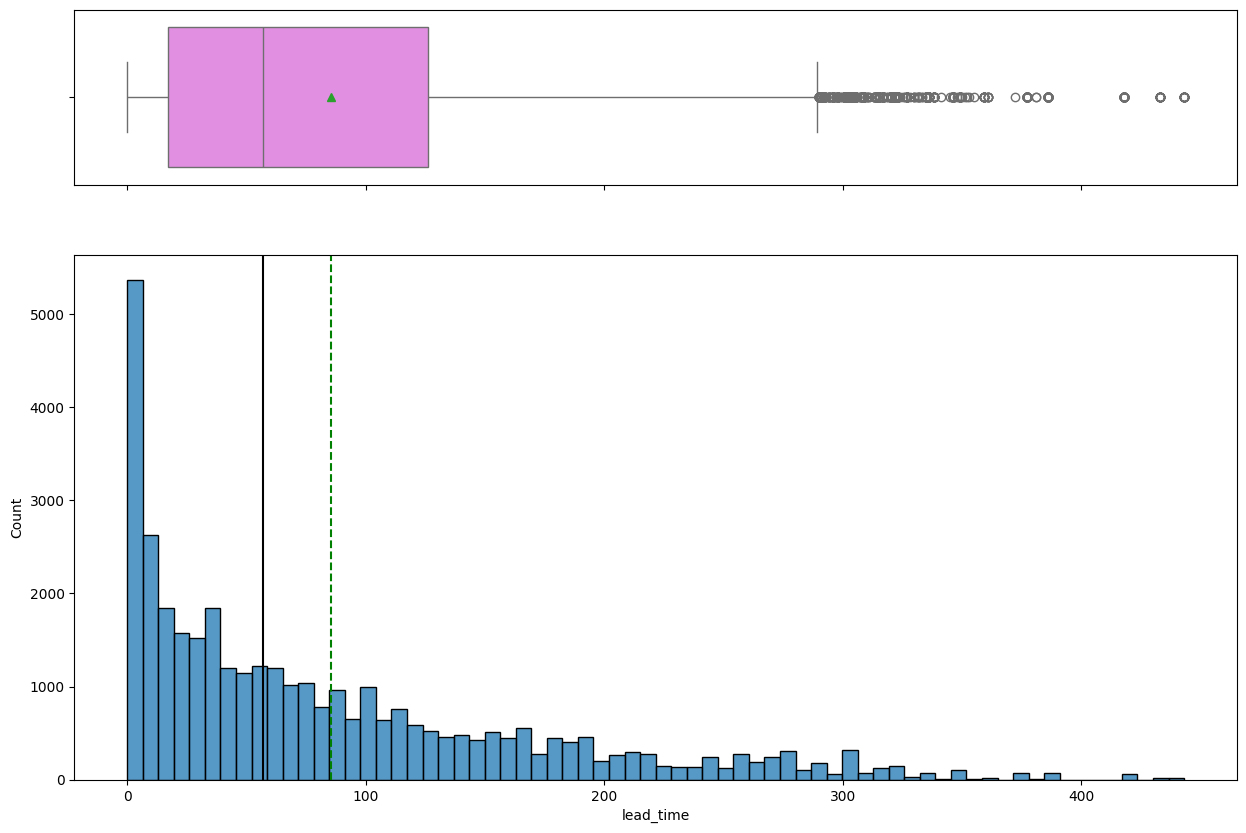

In [ ]:
histogram_boxplot(df, 'lead_time')

- The distribution of `lead` time is highly skewed due to presence of many outliers
- About 75% of the bookings have lead time of less than 200 days.
- Some extreme cases have been encountered where customer booked more than 400 days before the arrival day

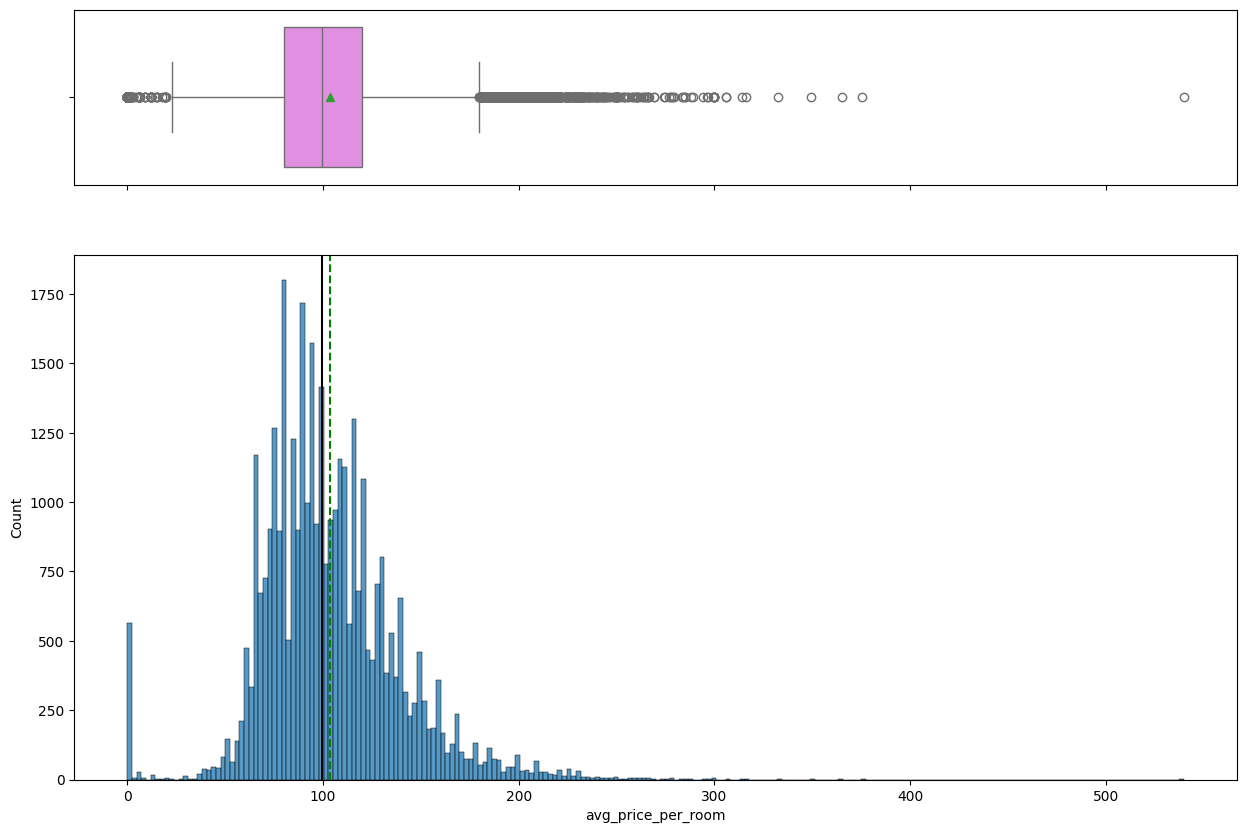

In [ ]:
histogram_boxplot(df, 'avg_price_per_room')

- The distibution of `avg_price_per_room` is close to normal as mean and median are in close range to each other
- Majority of rooms have prices less than 200 euros
- Some of the outliers present rooms whose price are exceedingly high upto 500 euros  
- Some records in the dataset have recorded 0 euros as `average_price_per_room` which is unrealistic, although we cannot simple consider it as an anomaly as we have seen there is a complimentary market segment which means  a room or service is provided to a guest at no cost

## Bivariate Analysis

/tmp/ipython-input-2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/tmp/ipython-input-2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


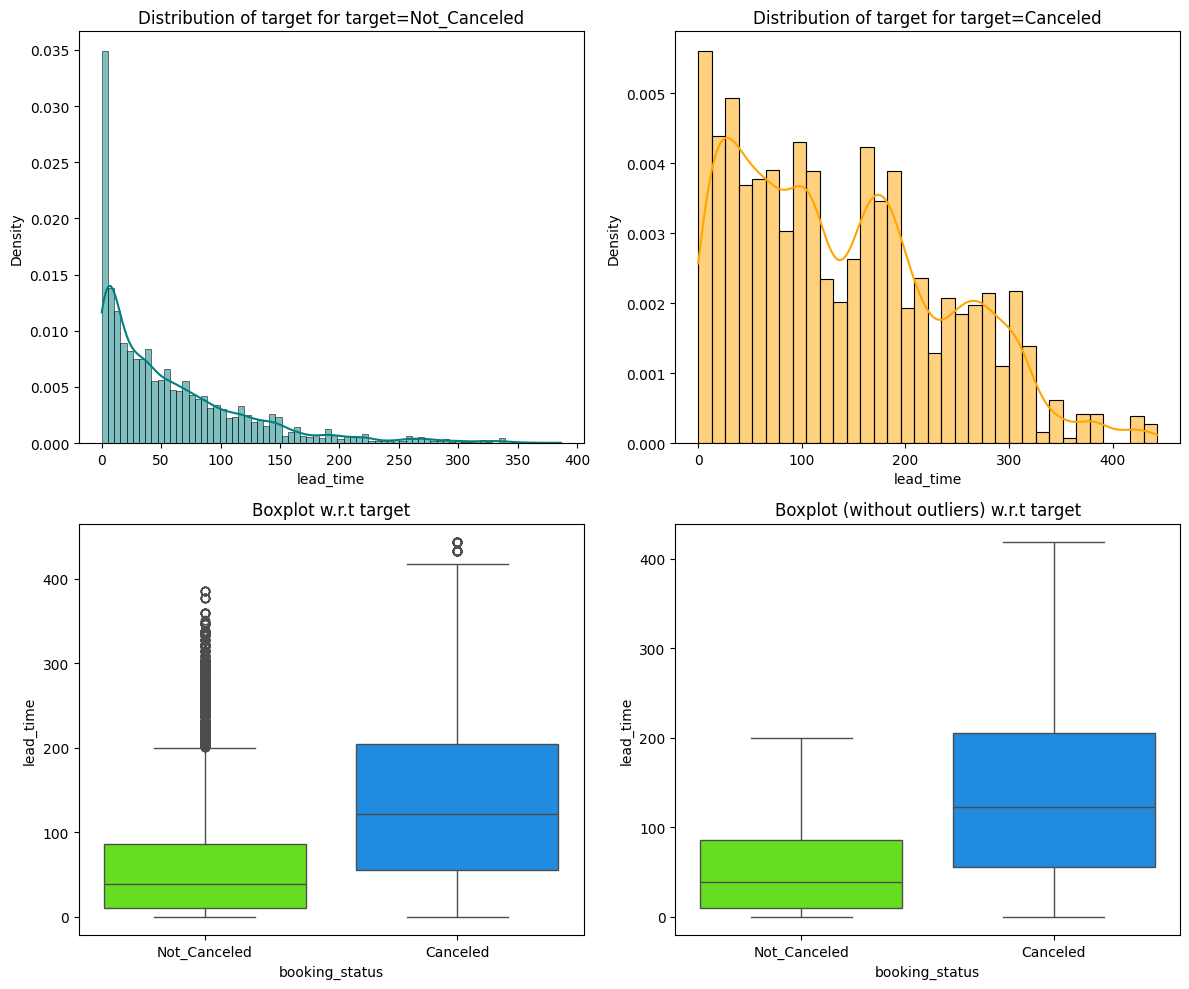

In [ ]:
distribution_plot_wrt_target(df, 'lead_time', 'booking_status')

- Bookings with shorter lead times (0–50 days) are far less likely to be canceled, while bookings made well in advance (over 100 days) show a much higher cancellation tendency.
- Lead time has a strong positive relationship with cancellation probability — the longer the time between booking and arrival, the greater the chance of cancellation, as customers have more time to change or cancel plans.

/tmp/ipython-input-2848445933.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
/tmp/ipython-input-2848445933.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


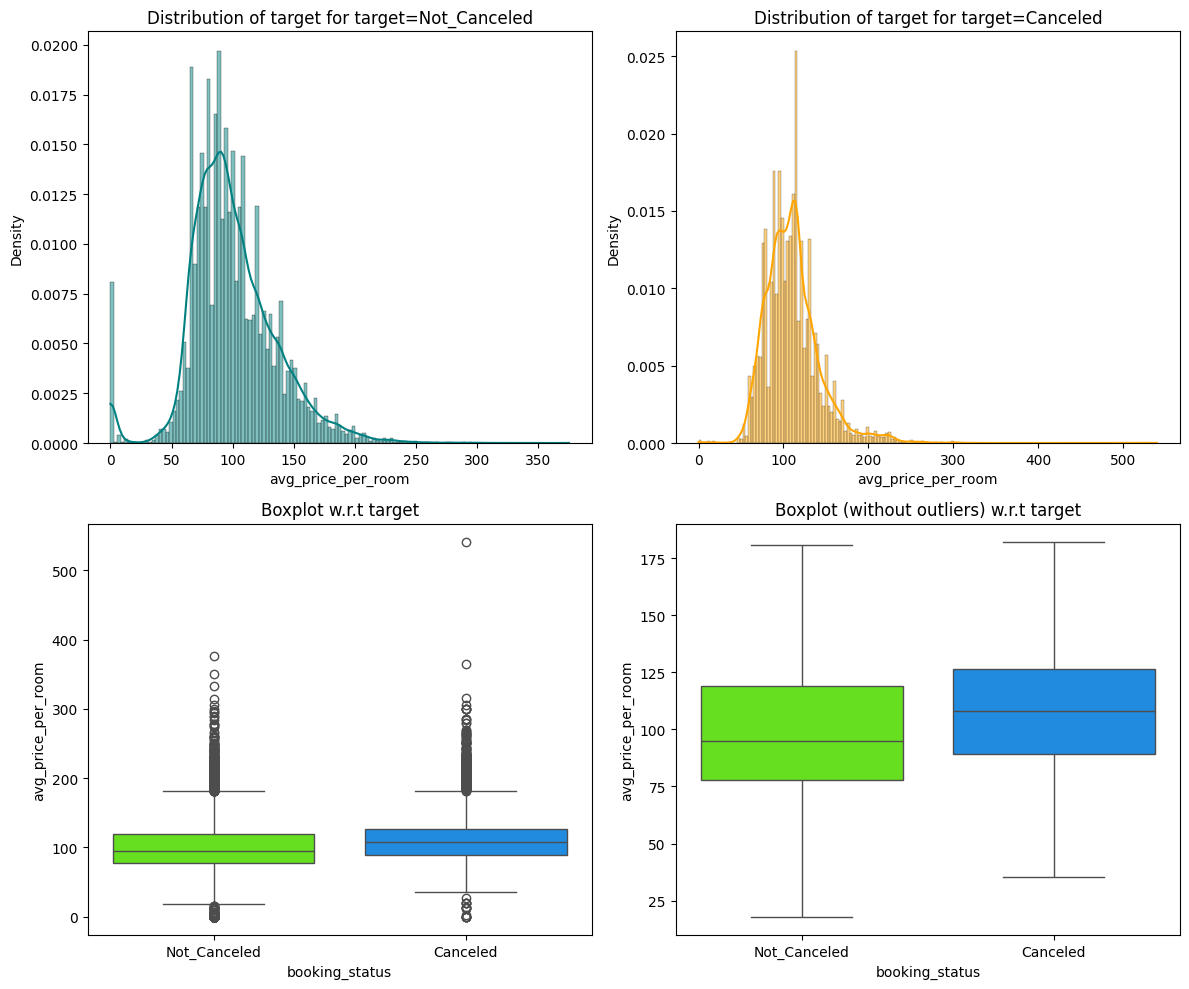

In [ ]:
distribution_plot_wrt_target(df, 'avg_price_per_room', 'booking_status')

- Cancellations are more frequent for higher room prices — the median `avg_price_per_room` for canceled bookings is slightly higher than for non-canceled ones, and the distribution is more concentrated around mid-to-high price ranges
- Price variation is wider among canceled bookings, indicating that customers paying higher prices might be more price-sensitive or likely to find alternative deals before arrival.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


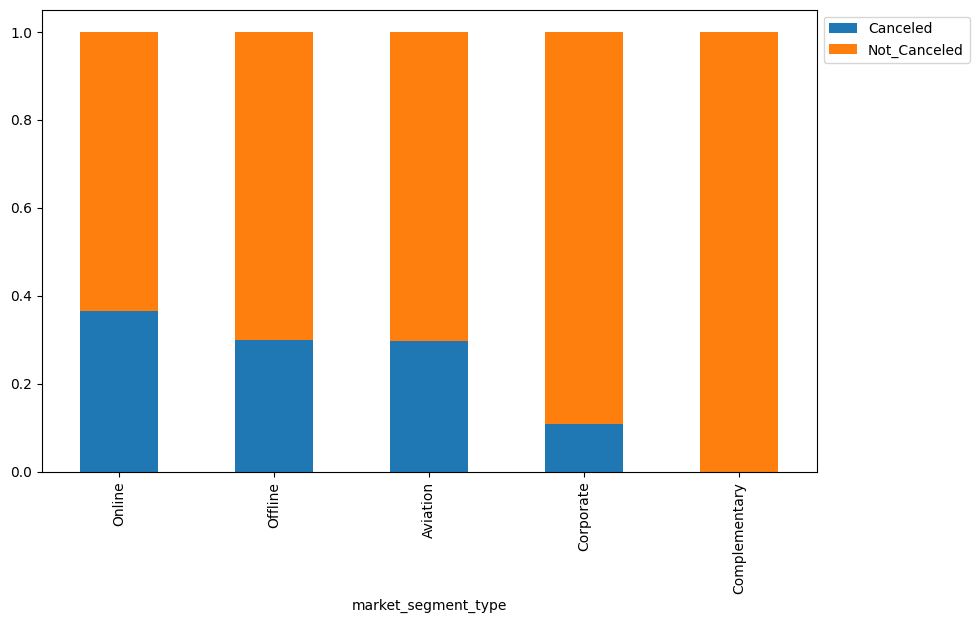

In [ ]:
stacked_barplot(df, 'market_segment_type', 'booking_status')

- **Online** bookings made via hotel's website or via online travel agencies have a higher chances of **cancelling**
- **Offline** or **Aviation** bookings(done by airline for their crews) have almost similar cancelling rates.But the chances of cancellation are less as compared to online bookings
- **Corporate** bookings reprsenting short business travels have lower cancellations as they mostly well-planned
- **Complimentary** bookings have shown 0 cancellations in the dataset

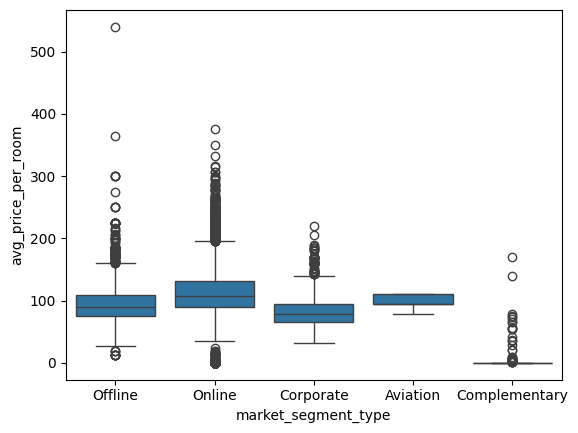

In [ ]:
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room');

- **Price Variation by Segment** : The *Online* and *Offline* market segments show the widest variation in average room prices, with many outliers and higher median values compared to other segments.
-  **Lowest Price Segment** : The *Complementary* segment has the lowest average prices, with most values near zero, indicating complimentary or discounted stays.
- **Stable Pricing** : The *Aviation* segment shows the most consistent pricing (narrow box, few outliers), suggesting standardized rates for this category.


booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


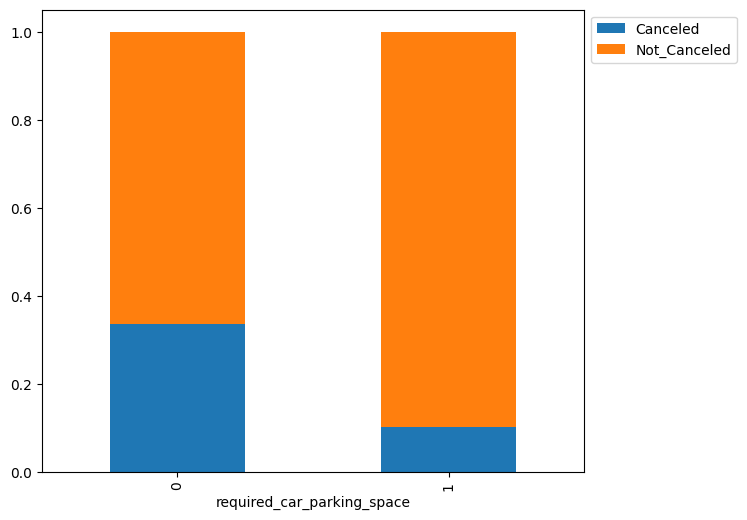

In [ ]:
stacked_barplot(df, 'required_car_parking_space', 'booking_status')

- Customers who have requested for car parking space while booking have lower cancellation rates

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


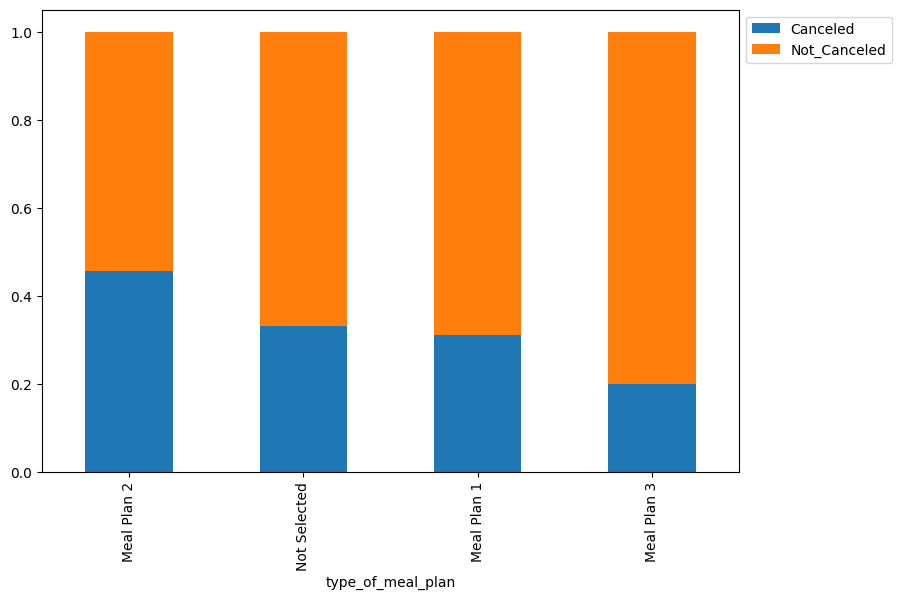

In [ ]:
stacked_barplot(df, 'type_of_meal_plan', 'booking_status')

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


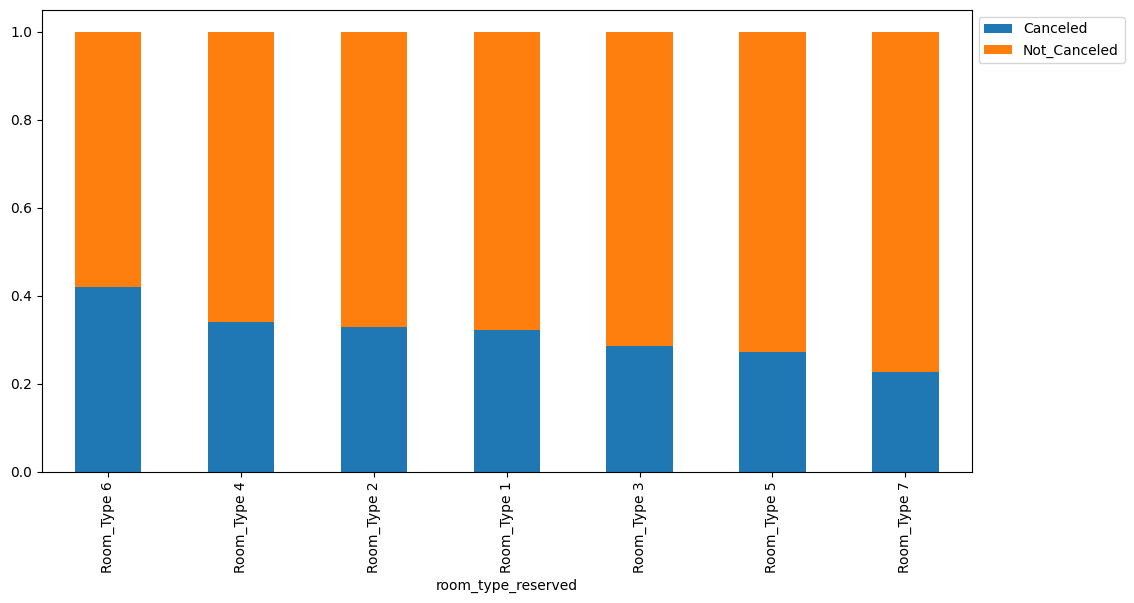

In [ ]:
stacked_barplot(df, 'room_type_reserved', 'booking_status')

- Different room types have varied cancellation rates.So does the the bookings with different meal plans
- We can use chi-square contingency tests to statistically check and actually understand if room/meal plans have effect on cancellations

In [ ]:
meal_crosstab = pd.crosstab(df['type_of_meal_plan'], df['booking_status'])

Ho = "Meal Plan and booking status are independent"   # Null Hypothesis
Ha = "Meal Plan and booking status are dependent"     # Alternate Hypothesis
chi, p_value, dof, expected = chi2_contingency(meal_crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value}) > 0.05")

Meal Plan and booking status are dependent as the p_value (4.951915406087789e-60) < 0.05


In [ ]:
room_crosstab = pd.crosstab(df['room_type_reserved'], df['booking_status'])

Ho = "Room type and booking status are independent"   # Null Hypothesis
Ha = "Room type and booking status are dependent"     # Alternate Hypothesis
chi, p_value, dof, expected = chi2_contingency(room_crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value}) > 0.05")

Room type and booking status are dependent as the p_value (1.5627796772447482e-10) < 0.05


booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


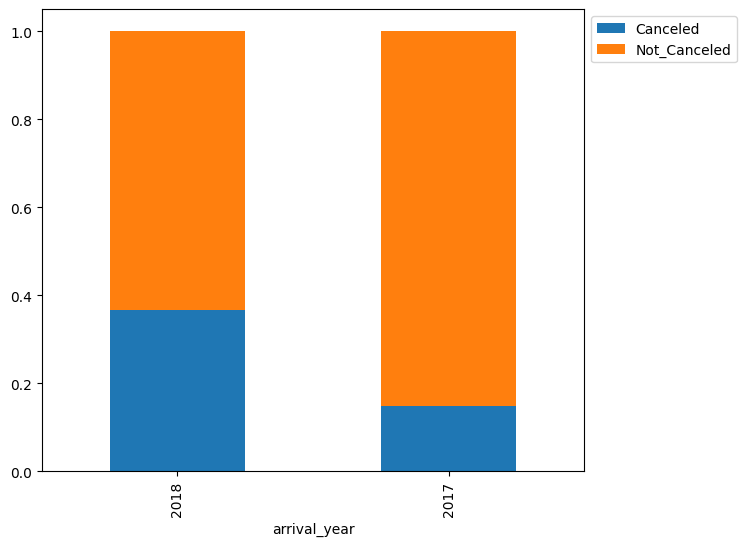

In [ ]:
stacked_barplot(df, 'arrival_year', 'booking_status')

- The number of cancellations are higher in 2018 as compared to year 2017

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


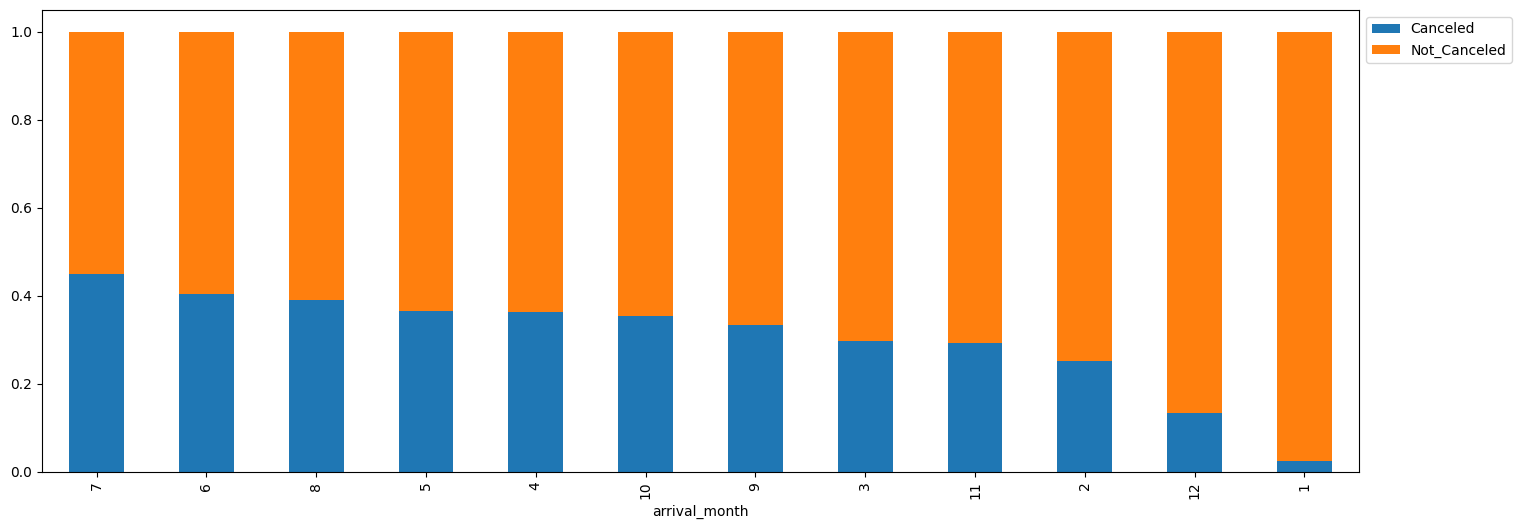

In [ ]:
stacked_barplot(df, 'arrival_month', 'booking_status')

- The arrivals in first and last months of year, ie, January, Feb, March, Nov and December have lowest cancellations
- The most popular time for guests to arrive is in the second half of the year has higher cancellation rates likely due to finding better deals or last-minute plan changes

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

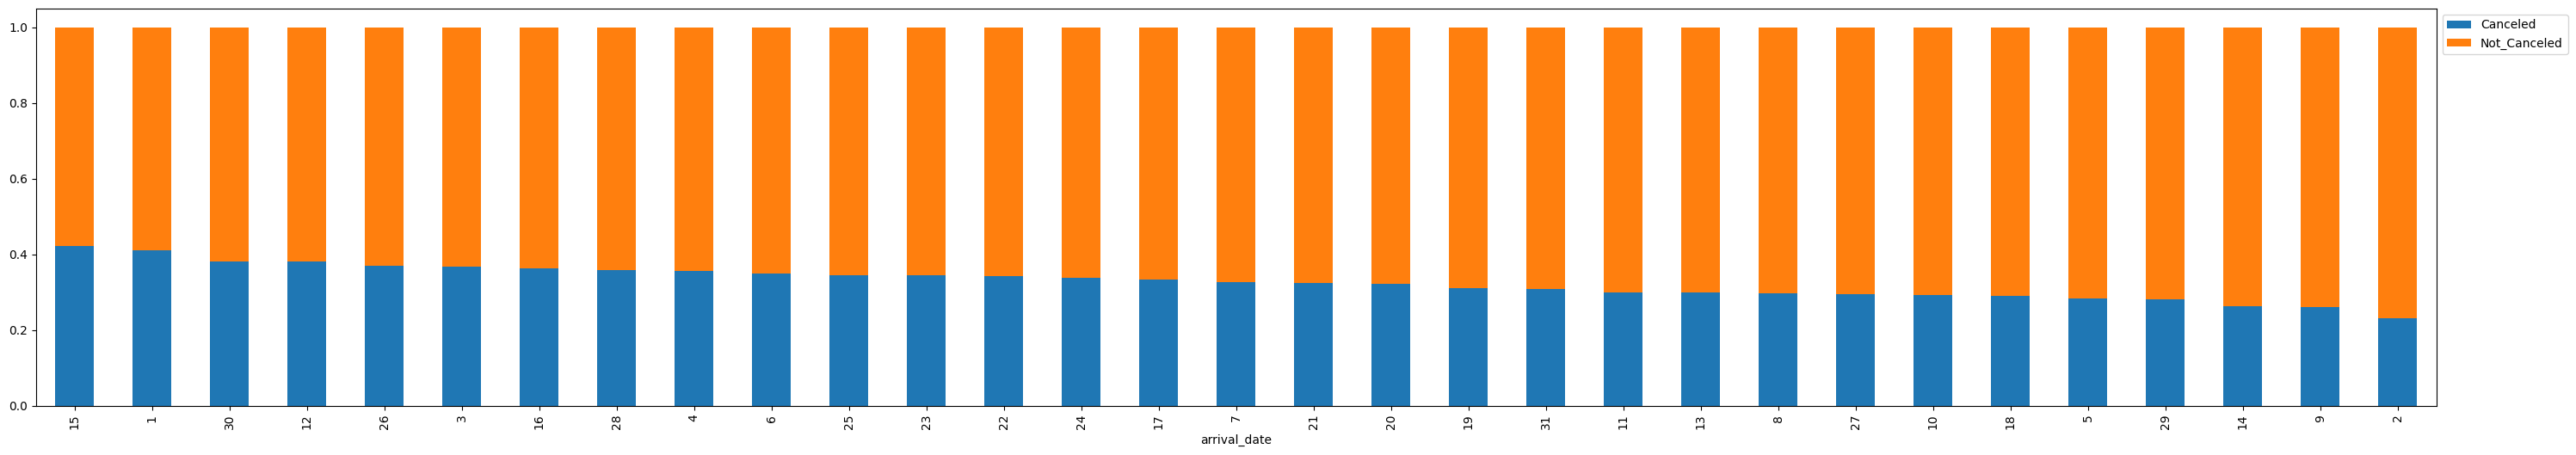

In [ ]:
stacked_barplot(df, 'arrival_date', 'booking_status')

- The cancellation rate seems to vary with arrival dates
- We can use chi-square contingency tests to statistically check the dependency of cancellation rate and arrival dates


In [ ]:
arrival_date_crosstab = pd.crosstab(df['arrival_date'], df['booking_status'])

Ho = "Arrival Date and booking status are independent"   # Null Hypothesis
Ha = "Arrival Date and booking status are dependent"     # Alternate Hypothesis
chi, p_value, dof, expected = chi2_contingency(arrival_date_crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value}) > 0.05")

Arrival Date and booking status are dependent as the p_value (1.3915931305634322e-50) < 0.05


booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


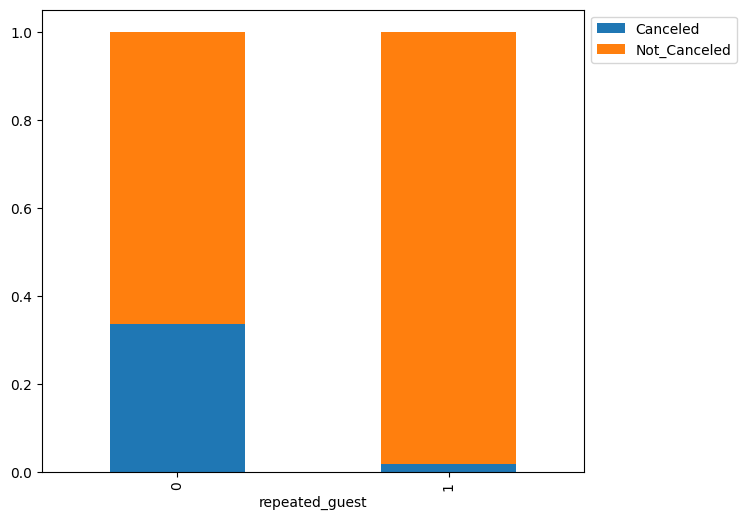

In [ ]:
stacked_barplot(df, 'repeated_guest', 'booking_status')

- Customers who make bookings as repeated guest have very low chances of cancellations as opposed to first time customers
- This represents INN Hotels Groups brand loyalty or customers who are satisfied with earlier experience of stays

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


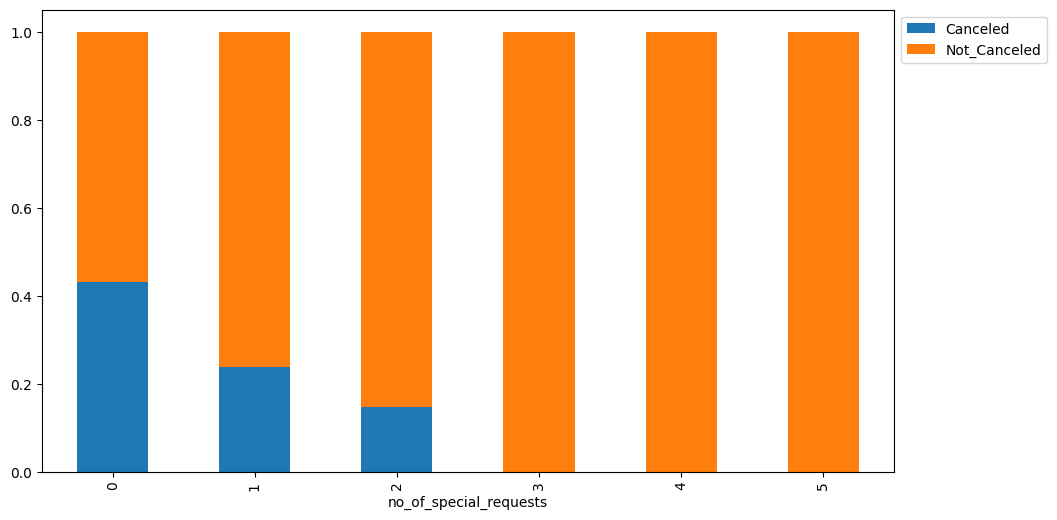

In [ ]:
stacked_barplot(df, 'no_of_special_requests', 'booking_status')

- Bookings with higer number of special requests have lower chances of cancellations
- For bookings with > 3 special requests, no cancellations have been recorded

## Key EDA Questions

**1. What are the busiest months in the hotel?**
- The most popular time for guests to arrive is in the second half of the year, particularly from July through December, which coincides with the fall and winter seasons.
- The most popular month for visitors is October, followed by September. This is because in September - October, Portugal's weather shifts to mild autumn conditions mild and pleasant
- The festive season in November and December also seems to attracts a high number of guests.

**2. Which market segment do most of the guests come from?**

- 64% of the bookings are done online followed by offline bookings that accounts to 29%
- Out of remaining 7% of customers, majority are from Aviation and Corporate segments

**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

- Price Variation by Segment : The *Online* and *Offline* market segments show the widest variation in average room prices, with many outliers and higher median values compared to other segments.
-  Lowest Price Segment : The *Complementary* segment has the lowest average prices, with most values near zero, indicating complimentary or discounted stays.
- Stable Pricing: The *Aviation* segment shows the most consistent pricing (narrow box, few outliers), suggesting standardized rates for this category.

**4. What percentage of bookings are canceled?**

- **~33%** of the bookings are cancelled, rest 67% are not.

**5. Repeating guests are important to brand equity. What percentage of repeating guests cancel?**

- Customers who make bookings as repeated guest have very low chances of cancellations as opposed to first time customers.Out of 930 repeated guests only 16 have made cancellations.
- Only **0.017%** of the repeated guests have done cancellations
- This represents INN Hotels Groups brand loyalty or customers who are satisfied with earlier experience of stays

**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

- Bookings with higer number of special requests have lower chances of cancellations
- For bookings with **> 3** special requests, no cancellations have been recorded



## Observations from EDA Summarized

1. **Booking Cancellations:** Around 33% of total bookings are canceled, showing a moderate class imbalance; most cancellations come from new customers rather than repeated guests.

2. **Customer Behavior:** 97% of guests are first-time visitors, while repeated guests (3%) show very high loyalty with negligible cancellations.

3. **Booking Channels:** The Online segment dominates (64% of bookings) but also shows the highest cancellation rates; Offline and Corporate bookings are more stable.

4. **Seasonality:** Guest arrivals peak from July to December, especially in October, driven by pleasant weather and festive tourism; cancellations are fewer in January-March and November-December.

5. **Stay Duration:** Most guests stay for 1-3 weeknights and up to 2 weekend nights, indicating short trips or business visits.

6. **Room Prices:** The average price per room is about 103 euros, with wide variation (0-540 euros); Complimentary stays account for 0-value prices and show no cancellations.

7. **Lead Time Effect:** Longer lead times (bookings made far in advance) are strongly linked to higher cancellation probability.

8. **Special Requests & Parking:** Bookings with more special requests and those requesting parking have lower cancellation rates, indicating more committed guests.

9. **Meal Plan & Room Type Influence:** Statistical tests show both meal plan and room type significantly affect cancellation likelihood.

10. **Market Segment Pricing:** Online and Offline segments show wider price ranges, Aviation prices remain stable, and Corporate bookings are generally well-planned with fewer cancellations.

# Data-Preprocessing

**Number of Adults**

In [ ]:
df[(df['no_of_adults'] == 0)].shape

(139, 18)

- There are 139 bookings where `no_of_adults=0`
- As mentioned before, number of adults equals 0 in the records might be indicating a data-entry error
- Since for a valid booking atleast once adult is required, we can set `no_of_adults = 1` in cases where `no_of_adults=0` and `no_of_children > 0`

In [ ]:
df.loc[(df['no_of_adults'] == 0) & (df['no_of_children'] > 0), 'no_of_adults'] = 1

**Handling `avg_price_per_room`**

- A complimentary hotel booking means a room or service is provided to a guest at no cost.
- Replace `avg_price_per_room = 0` only for **non-Complementary** segments.
- We can replace `avg_price_per_room = 0` with the mean average price of rooms booked by the market segment

In [ ]:
df[df['avg_price_per_room']==0]['market_segment_type'].value_counts()

,count
market_segment_type,
Complementary,354
Online,191


In [ ]:
for seg in df['market_segment_type'].unique():
    mask = (df['avg_price_per_room'] == 0) & (df['market_segment_type'] == seg) & (seg != 'Complementary')
    mean_price = df.loc[(df['market_segment_type'] == seg) & (df['avg_price_per_room'] > 0), 'avg_price_per_room'].mean()
    df.loc[mask, 'avg_price_per_room'] = mean_price

**Encoding Booking Status**

In [ ]:
df['booking_status'] = df['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})

/tmp/ipython-input-2408637662.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['booking_status'] = df['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})


**One-Hot Encoding for Categorical Features**

In [ ]:
df= pd.get_dummies(df, columns=['type_of_meal_plan', 'market_segment_type', 'room_type_reserved'], dtype='float', drop_first=True)

**Feature Engineering**

- To monitor `Total Guests` and `Total Nights Stayed` in a given booking

In [ ]:
df['total_guests'] = df['no_of_adults'] + df['no_of_children']
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

**Arrival Date & Year**

- The discrete values of `arrival_date` from 1 to 31 are too detailed to provide meaningful predictive power in a model.However, we can retain them for now
- `arrival_year` has only values - 2017 and 2018

**Outliers Detection & Treatment**

- For features `lead_time` and `avg_price_per_room` there is extreme right-skewness because of outlier values
- However, they seem to be legit as outliers so we can keep those values

**Splitting Data into Train and Test Sets**

In [ ]:
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

X = sm.add_constant(X.astype(float))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
booking_status
0    0.672377
1    0.327623
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.672333
1    0.327667
Name: proportion, dtype: float64


# Model Building

**Model Evaluation Criterion**

Models can make wrong predications as :
1. The model predicted that the booking will be cancelled but in reality the customer didn't cancel the booking
2. The model predicted that the booking will not be cancelled but in reality the booking was cancelled

**Which case is more important?**

The second case is more important as last minute cancellations might impact hotel on various fronts like Loss of resources (revenue) when the hotel cannot resell the room, Human resources to make arrangements for the guests, etc

**`To reduce the above kind of loss, ie, False Negative we need to maximize the Recall`**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [ ]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


## Logistic Regression Model

In [ ]:
logistic_reg_model1 = sm.Logit(y_train, x_train, class_weight='balanced').fit()
print(logistic_reg_model1.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['class_weight']
  warnings.warn(msg, ValueWarning)


         Current function value: 0.424253
         Iterations: 35


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['class_weight']
  warnings.warn(msg, ValueWarning)


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.3292
Time:                        17:41:04   Log-Likelihood:                -10773.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -971.9919    121.078     -8.028      0.000   -1209.299    -734.684
no_of_adults                             0.0091      

**Checking Logistic Regression model performance on Training Set**

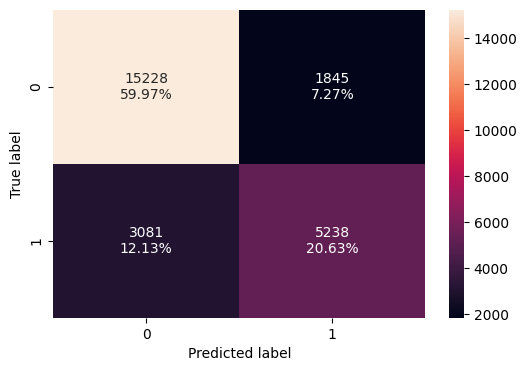

In [ ]:
plot_confusion_matrix(logistic_reg_model1, x_train, y_train)

In [ ]:
logistic_reg_perf_train = model_performance_classification(logistic_reg_model1, x_train, y_train)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.806002,0.629643,0.739517,0.680171


**Checking Logistic Regression model performance on test set**

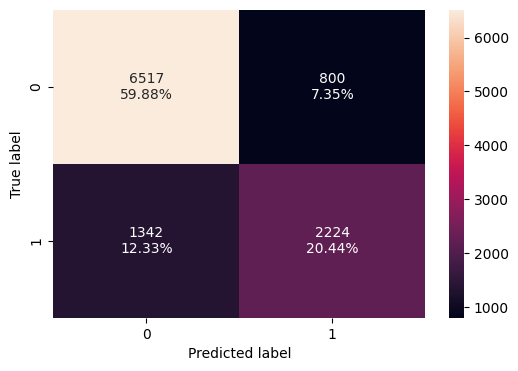

In [ ]:
plot_confusion_matrix(logistic_reg_model1, x_test, y_test)

In [ ]:
logistic_reg_perf_test = model_performance_classification(logistic_reg_model1, x_test, y_test)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.803179,0.623668,0.73545,0.674962


- The model generalizes well and displays consistent performance across training and testing datasets, indicating no signs of overfitting.
- Recall is ~0.62 for both training and testing datasets

## Decision Tree Model

In [ ]:
dt_model1 = DecisionTreeClassifier(random_state=1, class_weight='balanced')
dt_model1 = dt_model1.fit(x_train, y_train)

**Checking Decision Tree Classifier performance on Training Set**

In [ ]:
decision_tree_perf_train = model_performance_classification(dt_model1, x_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.993581,0.99423,0.986287,0.990242


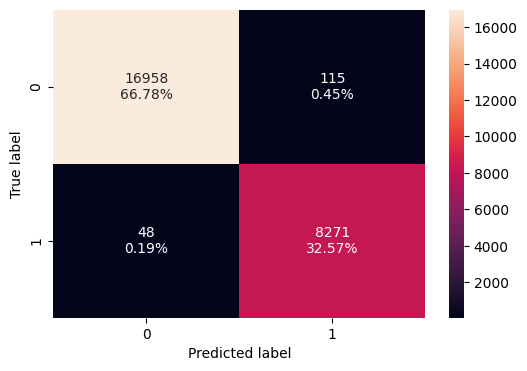

In [ ]:
plot_confusion_matrix(dt_model1, x_train, y_train)

**Checking Decision Tree Classifier performance on test set**

In [ ]:
decision_tree_perf_test = model_performance_classification(dt_model1, x_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.862722,0.787437,0.792325,0.789873


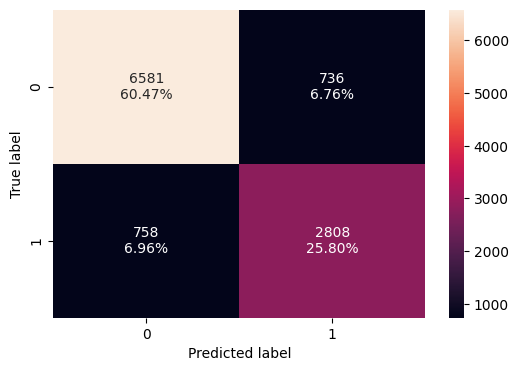

In [ ]:
plot_confusion_matrix(dt_model1, x_test, y_test)

- There is notable difference between the model performance measures of training and testing set
- The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
- We will have to prune the decision tree.

# Model Performance Improvement

## Logistic Regression (dealing with multicollinearity, remove high p-value variables, determine optimal threshold using ROC curve)

**Logistic Regression - Dealing with Multicollinearity**

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
vif_result = calculate_vif(x_train)

print("Variance Inflation Factors:")
print(vif_result)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factors:
                                Variable           VIF
0                                  const  3.946021e+07
1                           no_of_adults           inf
2                         no_of_children           inf
3                   no_of_weekend_nights           inf
4                      no_of_week_nights           inf
5             required_car_parking_space  1.034641e+00
6                              lead_time  1.408999e+00
7                           arrival_year  1.428389e+00
8                          arrival_month  1.282710e+00
9                           arrival_date  1.007735e+00
10                        repeated_guest  1.750632e+00
11          no_of_previous_cancellations  1.322048e+00
12  no_of_previous_bookings_not_canceled  1.570950e+00
13                    avg_price_per_room  2.151838e+00
14                no_of_special_requests  1.246850e+00
15         type_of_meal_plan_Meal Plan 2  1.285561e+00
16         type_of_meal_plan_Meal Pla

**Removing `total_guests`**

In [ ]:
x_train_reg1 = x_train.drop(['total_guests'], axis=1)
x_test_reg1 = x_test.drop(['total_guests'], axis=1)

In [ ]:
vif_result = calculate_vif(x_train_reg1)

print("Variance Inflation Factors:")
print(vif_result)

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factors:
                                Variable           VIF
0                                  const  3.946021e+07
1                           no_of_adults  1.335356e+00
2                         no_of_children  1.991981e+00
3                   no_of_weekend_nights           inf
4                      no_of_week_nights           inf
5             required_car_parking_space  1.034641e+00
6                              lead_time  1.408999e+00
7                           arrival_year  1.428389e+00
8                          arrival_month  1.282710e+00
9                           arrival_date  1.007735e+00
10                        repeated_guest  1.750632e+00
11          no_of_previous_cancellations  1.322048e+00
12  no_of_previous_bookings_not_canceled  1.570950e+00
13                    avg_price_per_room  2.151838e+00
14                no_of_special_requests  1.246850e+00
15         type_of_meal_plan_Meal Plan 2  1.285561e+00
16         type_of_meal_plan_Meal Pla

**Removing `total_nights`**

In [ ]:
x_train_reg2 = x_train_reg1.drop(['total_nights'], axis=1)
x_test_reg2 = x_test_reg1.drop(['total_nights'], axis=1)

In [ ]:
vif_result = calculate_vif(x_train_reg2)

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable           VIF
0                                  const  3.946021e+07
1                           no_of_adults  1.335356e+00
2                         no_of_children  1.991981e+00
3                   no_of_weekend_nights  1.070856e+00
4                      no_of_week_nights  1.097140e+00
5             required_car_parking_space  1.034641e+00
6                              lead_time  1.408999e+00
7                           arrival_year  1.428389e+00
8                          arrival_month  1.282710e+00
9                           arrival_date  1.007735e+00
10                        repeated_guest  1.750632e+00
11          no_of_previous_cancellations  1.322048e+00
12  no_of_previous_bookings_not_canceled  1.570950e+00
13                    avg_price_per_room  2.151838e+00
14                no_of_special_requests  1.246850e+00
15         type_of_meal_plan_Meal Plan 2  1.285561e+00
16         type_of_meal_plan_Meal Pla

**Dropping column `market_segment_type_Online`**

In [ ]:
x_train_reg3 = x_train_reg2.drop(['market_segment_type_Online'], axis=1)
x_test_reg3 = x_test_reg2.drop(['market_segment_type_Online'], axis=1)

In [ ]:
vif_result = calculate_vif(x_train_reg3)

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable           VIF
0                                  const  3.936887e+07
1                           no_of_adults  1.318667e+00
2                         no_of_children  1.991451e+00
3                   no_of_weekend_nights  1.070532e+00
4                      no_of_week_nights  1.096577e+00
5             required_car_parking_space  1.034553e+00
6                              lead_time  1.404407e+00
7                           arrival_year  1.425437e+00
8                          arrival_month  1.281471e+00
9                           arrival_date  1.007704e+00
10                        repeated_guest  1.747589e+00
11          no_of_previous_cancellations  1.321954e+00
12  no_of_previous_bookings_not_canceled  1.570605e+00
13                    avg_price_per_room  2.150262e+00
14                no_of_special_requests  1.242087e+00
15         type_of_meal_plan_Meal Plan 2  1.285102e+00
16         type_of_meal_plan_Meal Pla

- From the given VIF table, none of the variables have VIF > 5
- There is no significant multicollinearity among the independent variables

In [ ]:
logistic_reg_model2 = sm.Logit(y_train, x_train_reg3).fit()
print(logistic_reg_model2.summary())

         Current function value: 0.424252
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.3292
Time:                        17:41:14   Log-Likelihood:                -10773.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -972.3018    120.929     -8.040      0.000   -1209.318

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Remove High p-value variables**

In [ ]:
# initial list of columns
predictors = x_train_reg3.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

         Current function value: 0.424252
         Iterations: 35
Dropping column market_segment_type_Complementary with p-value: 0.9976649037190648


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.424598
         Iterations 16
Dropping column room_type_reserved_Room_Type 3 with p-value: 0.6323006413916221
Optimization terminated successfully.
         Current function value: 0.424603
         Iterations 16
Dropping column type_of_meal_plan_Meal Plan 3 with p-value: 0.2036741263539602
Optimization terminated successfully.
         Current function value: 0.424644
         Iterations 16
Dropping column no_of_previous_bookings_not_canceled with p-value: 0.1277701293478687
Optimization terminated successfully.
         Current function value: 0.424811
         Iterations 11
Dropping column arrival_date with p-value: 0.13519133795609667
Optimization terminated successfully.
         Current function value: 0.424855
         Iterations 11
Dropping column no_of_children with p-value: 0.10969520020289598
Optimization terminated successfully.
         Current function value: 0.424905
         Iterations 11
Dropping 

In [ ]:
x_train_reg4 = x_train_reg3[selected_features]
x_test_reg4 = x_test_reg3[selected_features]

In [ ]:
logistic_reg_model3 = sm.Logit(y_train, x_train_reg4, class_weight='balanced').fit()
print(logistic_reg_model3.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['class_weight']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully.
         Current function value: 0.424956
         Iterations 11


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['class_weight']
  warnings.warn(msg, ValueWarning)


                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.3281
Time:                        17:41:18   Log-Likelihood:                -10790.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -952.6797    120.688     -7.894      0.000   -1189.224    -716.135
no_of_weekend_nights               0.1530      0.020      7.739      0.

**Determine Optimal Threshold using ROC Curve**

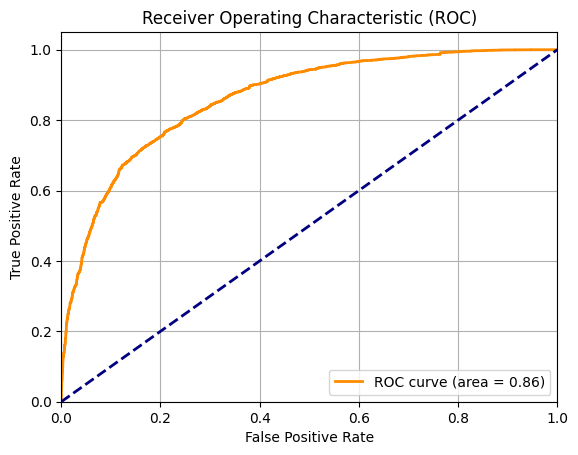

In [ ]:
y_pred = logistic_reg_model3.predict(x_train_reg4)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.331


**Checking tuned Logistic Regression model performance on training set**

In [ ]:
logistic_reg_tune_perf_train = model_performance_classification(logistic_reg_model3, x_train_reg4, y_train, optimal_threshold_logit )
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.782884,0.765477,0.641289,0.697901


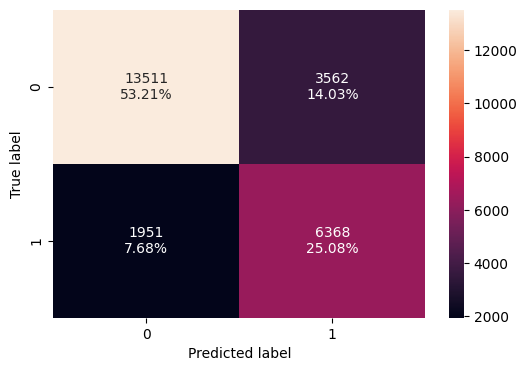

In [ ]:
plot_confusion_matrix(logistic_reg_model3, x_train_reg4, y_train, optimal_threshold_logit)

**Checking tuned Logistic Regression model performance on test set**

In [ ]:
logistic_reg_tune_perf_test = model_performance_classification(logistic_reg_model3, x_test_reg4, y_test, optimal_threshold_logit )
logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.777911,0.765003,0.633388,0.693001


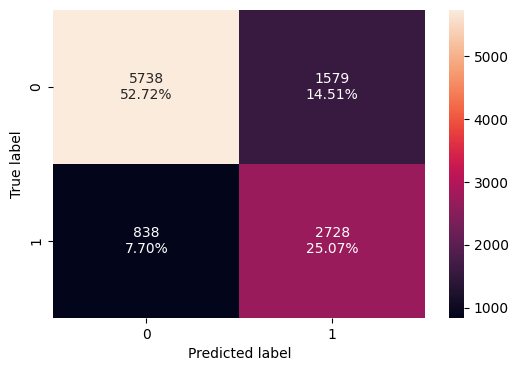

In [ ]:
plot_confusion_matrix(logistic_reg_model3, x_test_reg4, y_test, optimal_threshold_logit)

- The performance of the Logistic Regression model has improved considerably (on both training and test sets) by dropping variables with high p-values and setting an optimal threshold.
- The initial model had a recall score of rougly 0.64 on both test and train set.After tuning the recall score has improved to about 0.76 for both test and train sets


## Decision Tree Classifier (pre-pruning or post-pruning)

**Pre - pruning the tree**

In [ ]:
dt_model_tuned_1 = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned_1, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned_1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(11),
                       max_leaf_nodes=100, min_samples_split=30,
                       random_state=1)

**Checking pre-pruned Decision Tree Classifier performance on training set**

In [ ]:
dt_model_tuned_1_perf_train = model_performance_classification(dt_model_tuned_1, x_train, y_train)
dt_model_tuned_1_perf_train

,Accuracy,Recall,Precision,F1
0,0.864485,0.838562,0.76879,0.802162


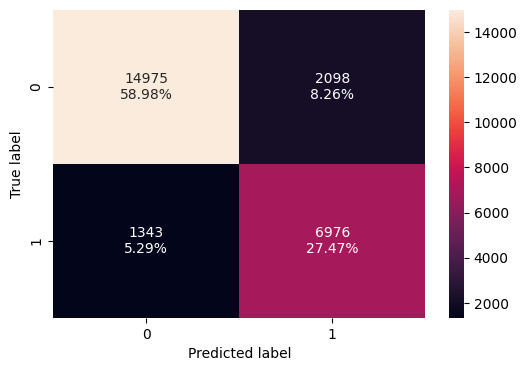

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, x_train, y_train)

**Checking pre-pruned Decision Tree Classifier performance on test set**

In [ ]:
dt_model_tuned_1_perf_test = model_performance_classification(dt_model_tuned_1, x_test, y_test)
dt_model_tuned_1_perf_test

,Accuracy,Recall,Precision,F1
0,0.853992,0.818845,0.755889,0.786108


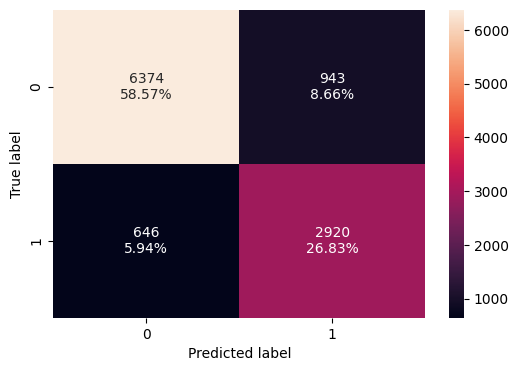

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, x_test, y_test)

**Visualizing the Decision Tree**

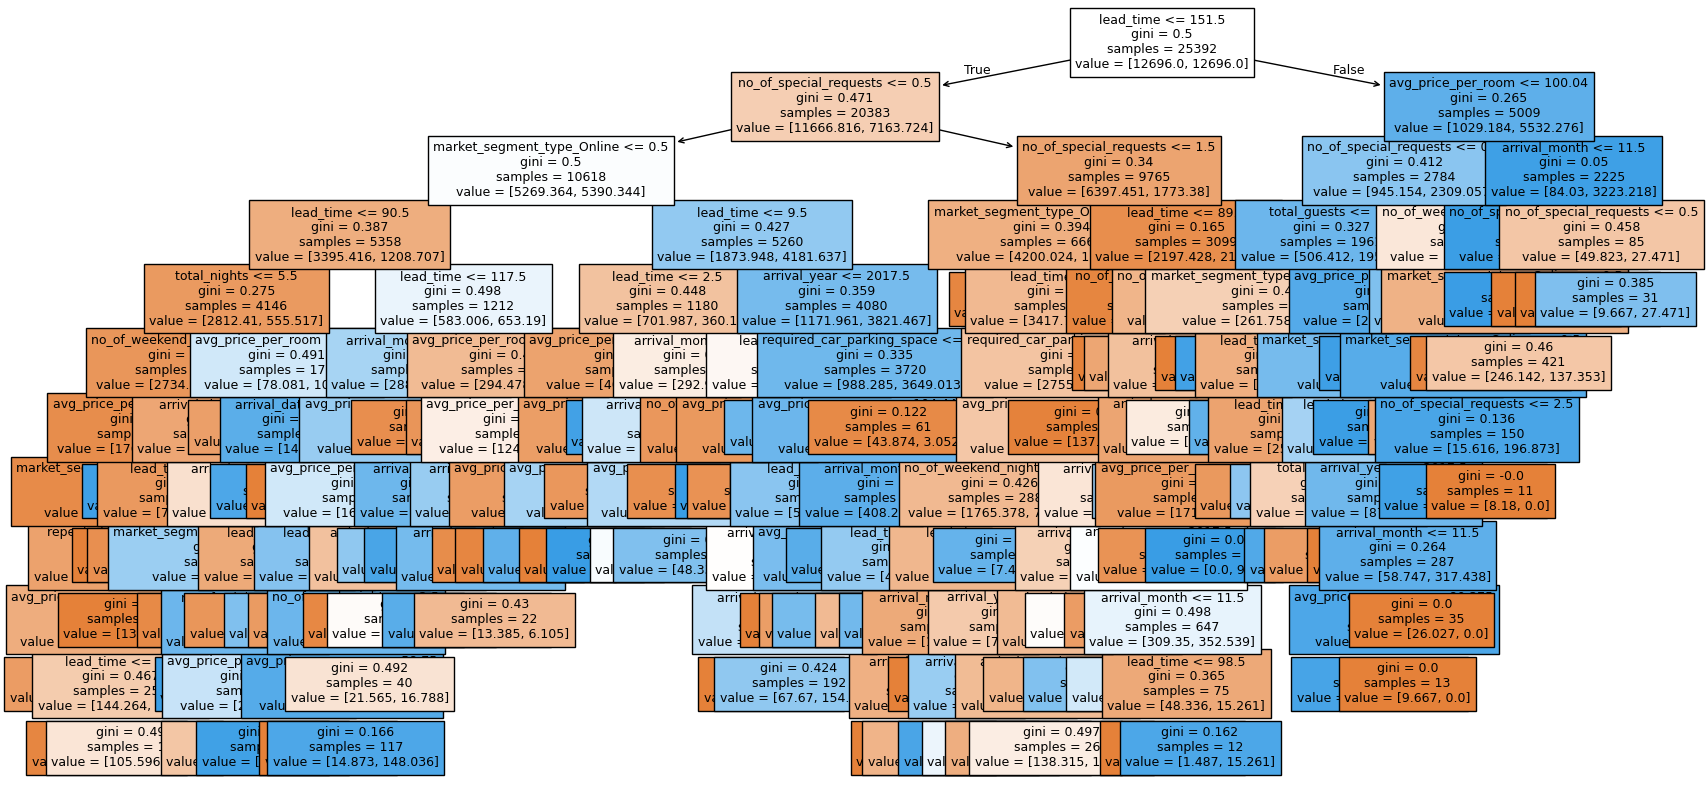

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned_1,
    feature_names=x_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Analyzing Feature Importance for tuned Decision Tree Classifier**

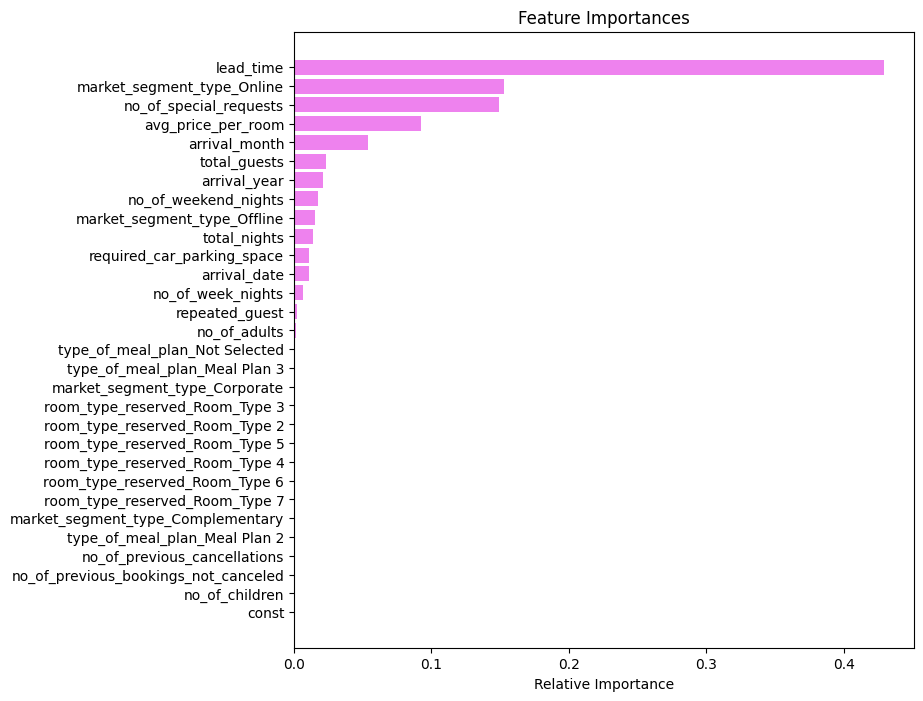

In [ ]:
feature_names = x_train.columns.tolist()
importances = dt_model_tuned_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Post - pruning the tree**

In [ ]:
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008331
1,-8.131516e-20,0.008331
2,0.000000e+00,0.008331
3,2.926260e-20,0.008331
4,2.926260e-20,0.008331
...,...,...
1605,9.074926e-03,0.327908
1606,9.408290e-03,0.337317
1607,1.253153e-02,0.349848
1608,3.404623e-02,0.417941


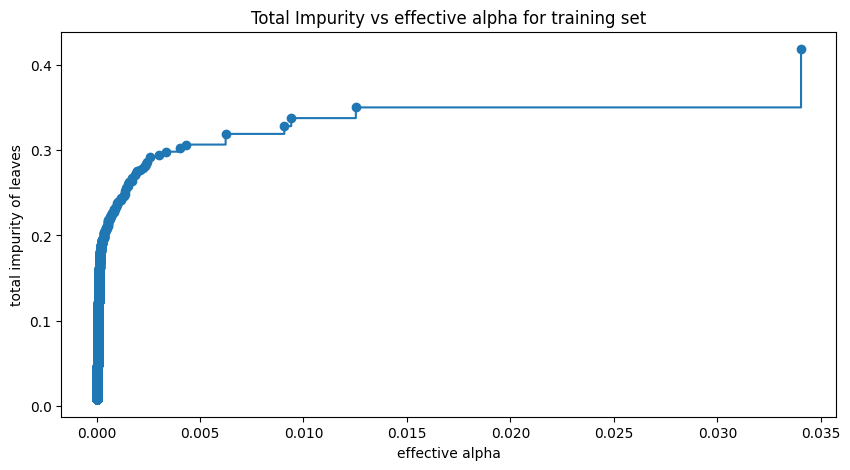

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, `clfs[-1]`, with one node.

In [ ]:
dt_models = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_model.fit(x_train, y_train)
    dt_models.append(dt_model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dt_models[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08205938055990725


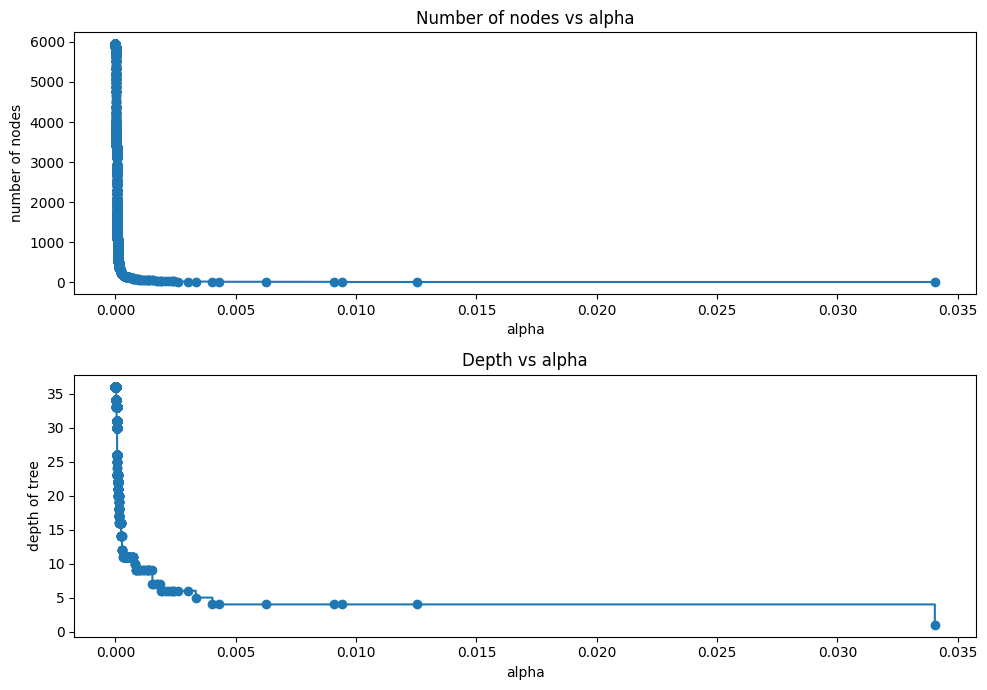

In [ ]:
dt_models = dt_models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt_model.tree_.node_count for dt_model in dt_models]
depth = [dt_model.tree_.max_depth for dt_model in dt_models]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and test sets**

In [ ]:
recall_train = []
for dt_mpdel in dt_models:
    pred_train = dt_model.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for dt_model in dt_models:
    pred_test = dt_model.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

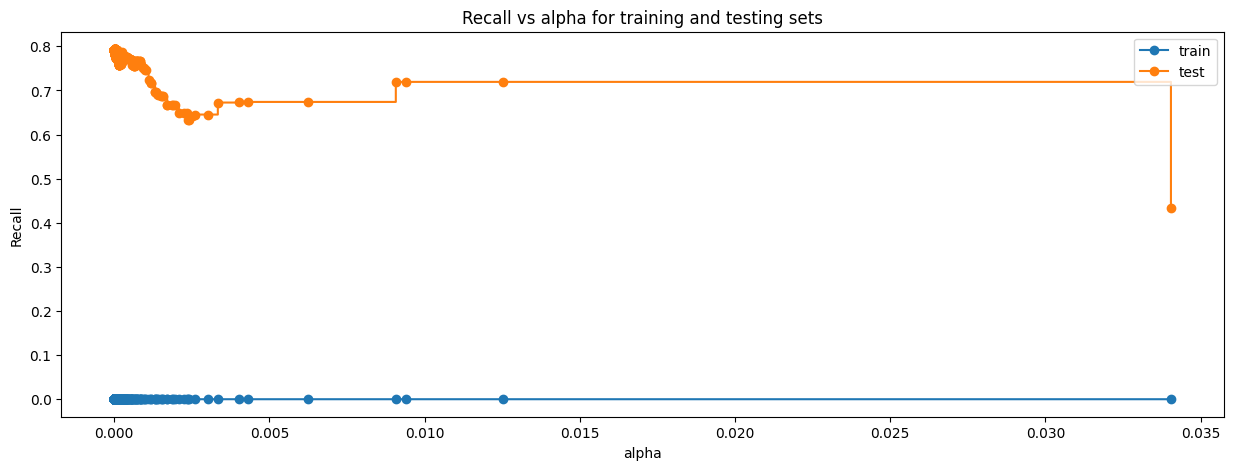

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
dt_model_post_pruned = dt_models[index_best_model]
print(dt_model_post_pruned)

DecisionTreeClassifier(ccp_alpha=np.float64(1.9945333174745584e-05),
                       random_state=1)


In [ ]:
dt_model_tuned_2 = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1)
dt_model_tuned_2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.08205938055990725),
                       random_state=1)

**Checking post-pruned Decision Tree Classifier performance on training set**

In [ ]:
dt_model_tuned_2_perf_train = model_performance_classification(dt_model_tuned_2, x_train, y_train)
dt_model_tuned_2_perf_train

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Recall,Precision,F1
0,0.672377,0.0,0.0,0.0


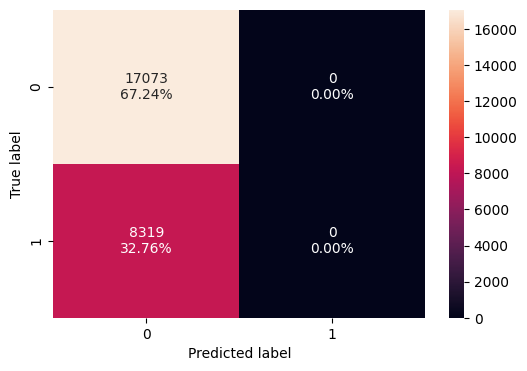

In [ ]:
plot_confusion_matrix(dt_model_tuned_2, x_train, y_train)

**Checking post-pruned Decision Tree Classifier performance on test set**

In [ ]:
dt_model_tuned_2_perf_test = model_performance_classification(dt_model_tuned_2, x_test, y_test)
dt_model_tuned_2_perf_test

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Recall,Precision,F1
0,0.672333,0.0,0.0,0.0


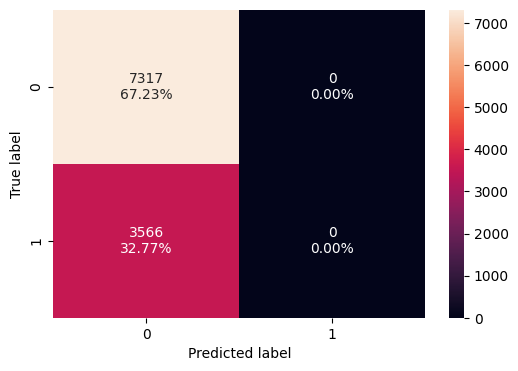

In [ ]:
plot_confusion_matrix(dt_model_tuned_2, x_test, y_test)

**Visualizing the Decision Tree**

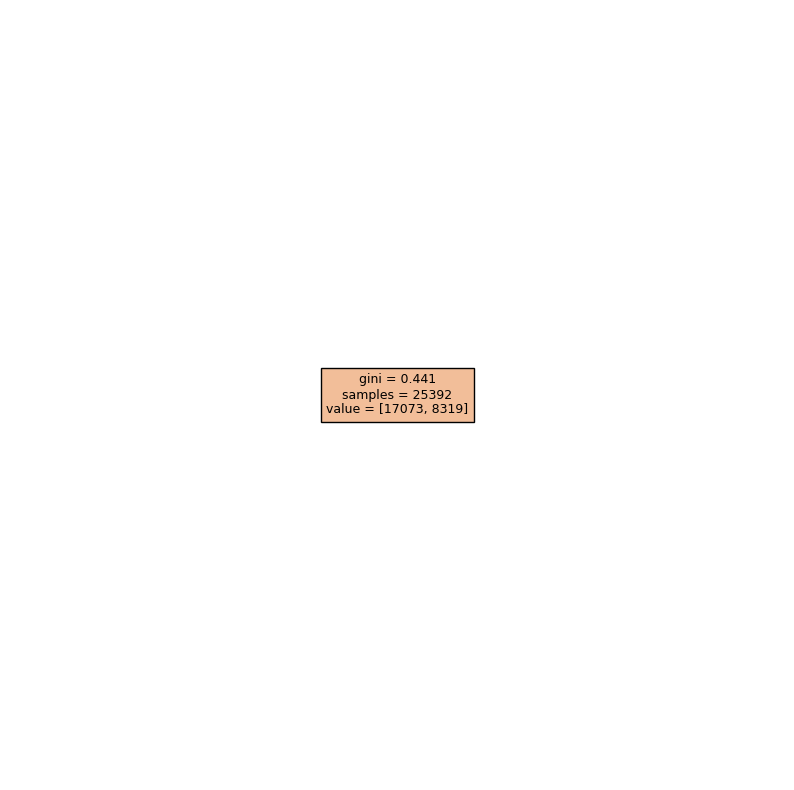

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    dt_model_tuned_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Analyzing Feature Importance for tuned Decision Tree Classifier**

In [ ]:
print(
    pd.DataFrame(
        dt_model_tuned_2.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
const                                 0.0
no_of_adults                          0.0
no_of_children                        0.0
no_of_weekend_nights                  0.0
no_of_week_nights                     0.0
required_car_parking_space            0.0
lead_time                             0.0
arrival_year                          0.0
arrival_month                         0.0
arrival_date                          0.0
repeated_guest                        0.0
no_of_previous_cancellations          0.0
no_of_previous_bookings_not_canceled  0.0
avg_price_per_room                    0.0
no_of_special_requests                0.0
type_of_meal_plan_Meal Plan 2         0.0
type_of_meal_plan_Meal Plan 3         0.0
type_of_meal_plan_Not Selected        0.0
market_segment_type_Complementary     0.0
market_segment_type_Corporate         0.0
market_segment_type_Offline           0.0
market_segment_type_Online            0.0
room_type_reserved_Room_Type 2    

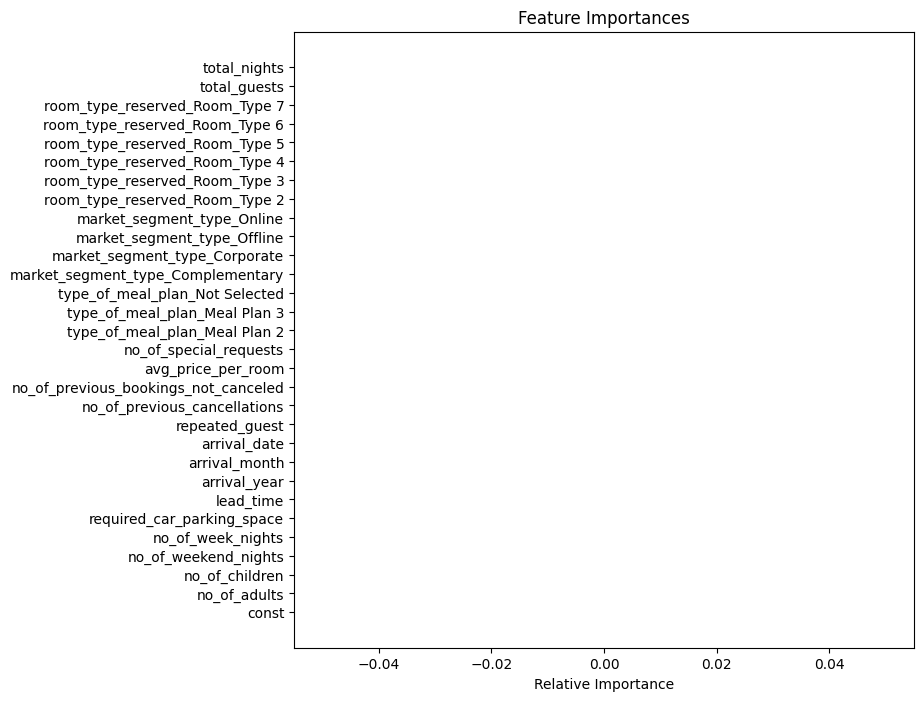

In [ ]:
importances = dt_model_tuned_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Model Performance Comparison and Final Model Selection


In [ ]:
models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        decision_tree_perf_train.T,
        dt_model_tuned_1_perf_train.T,
        dt_model_tuned_2_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Improved",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Improved,Decision Tree Base,Decision Tree Pre-Pruned,Decision Tree Post-Pruned
Accuracy,0.806002,0.782884,0.993581,0.864485,0.672377
Recall,0.629643,0.765477,0.994230,0.838562,0.000000
Precision,0.739517,0.641289,0.986287,0.768790,0.000000
F1,0.680171,0.697901,0.990242,0.802162,0.000000


In [ ]:
models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        logistic_reg_tune_perf_test.T,
        decision_tree_perf_test.T,
        dt_model_tuned_1_perf_test.T,
        dt_model_tuned_2_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Decision Tree Base,Decision Tree Pre-Pruned,Decision Tree Post-Pruned
Accuracy,0.803179,0.777911,0.862722,0.853992,0.672333
Recall,0.623668,0.765003,0.787437,0.818845,0.000000
Precision,0.735450,0.633388,0.792325,0.755889,0.000000
F1,0.674962,0.693001,0.789873,0.786108,0.000000


**Observations :**

- Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
- Pre-pruned tree has given a generalized performance with the recall score of 0.83 and 0.81 on training and test set, respectively.
- The company can predict cancellations using the pre-pruned tree.


# Business Insights & Recommendations

1. **High-risk bookings**: Guests who book far in **advance**, use **online channels**, or reserve **high-priced rooms** are more likely to cancel.
- The hotel should monitor such bookings closely and consider **flexible pricing** or **partial prepayment** policies to reduce last-minute cancellations.

2. **Loyal customers**: **Repeated guests** and those making **special requests** show strong loyalty and are less likely to cancel.
- The hotel can **reward** these customers through loyalty points, exclusive offers, or personalized service to encourage continued engagement.

3. **Value-added services**: Guests opting for **parking spaces** or **meal plans** tend to follow through with their bookings.
- The hotel can promote **bundled offers** (e.g., stay + breakfast + parking) to increase commitment and reduce cancellation rates.

4. **Seasonal trends**: Cancellations are lower in the first and last two months of a year.
- Plan **marketing and retention campaigns** around other high-cancellation periods to stabilize occupancy throughout the year.
- Staff can then take proactive measures—such as **follow-up calls** or **special offers**—to secure high-risk bookings and minimize revenue loss